w# Natural Language Processing Part #
# [PGR210_Fall 2022] #


#### 2.1 Practical Task: Text processing, feature extraction and representation by using both TF and TF-IDF schemes ####

#### 2.1.1 Data Preparation ####

In [ ]:
from collections import Counter
import time
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import sparse
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
import plotly.express as px
import gensim.models
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize.casual import casual_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import linear_kernel
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings('ignore')
import os
import json
from tqdm import tqdm_notebook
import gensim
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from gensim import corpora, models, similarities
import logging
import tempfile
from string import punctuation
from collections import OrderedDict
init_notebook_mode(connected=True) #do not miss this line
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP

In [2]:
# Load the data
data = pd.read_csv('NLP.csv')
data

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [3]:
#getting first impression
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
# Check if there is any column with null value
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Access the columns and visualization ####

Budget

<AxesSubplot:xlabel='id'>

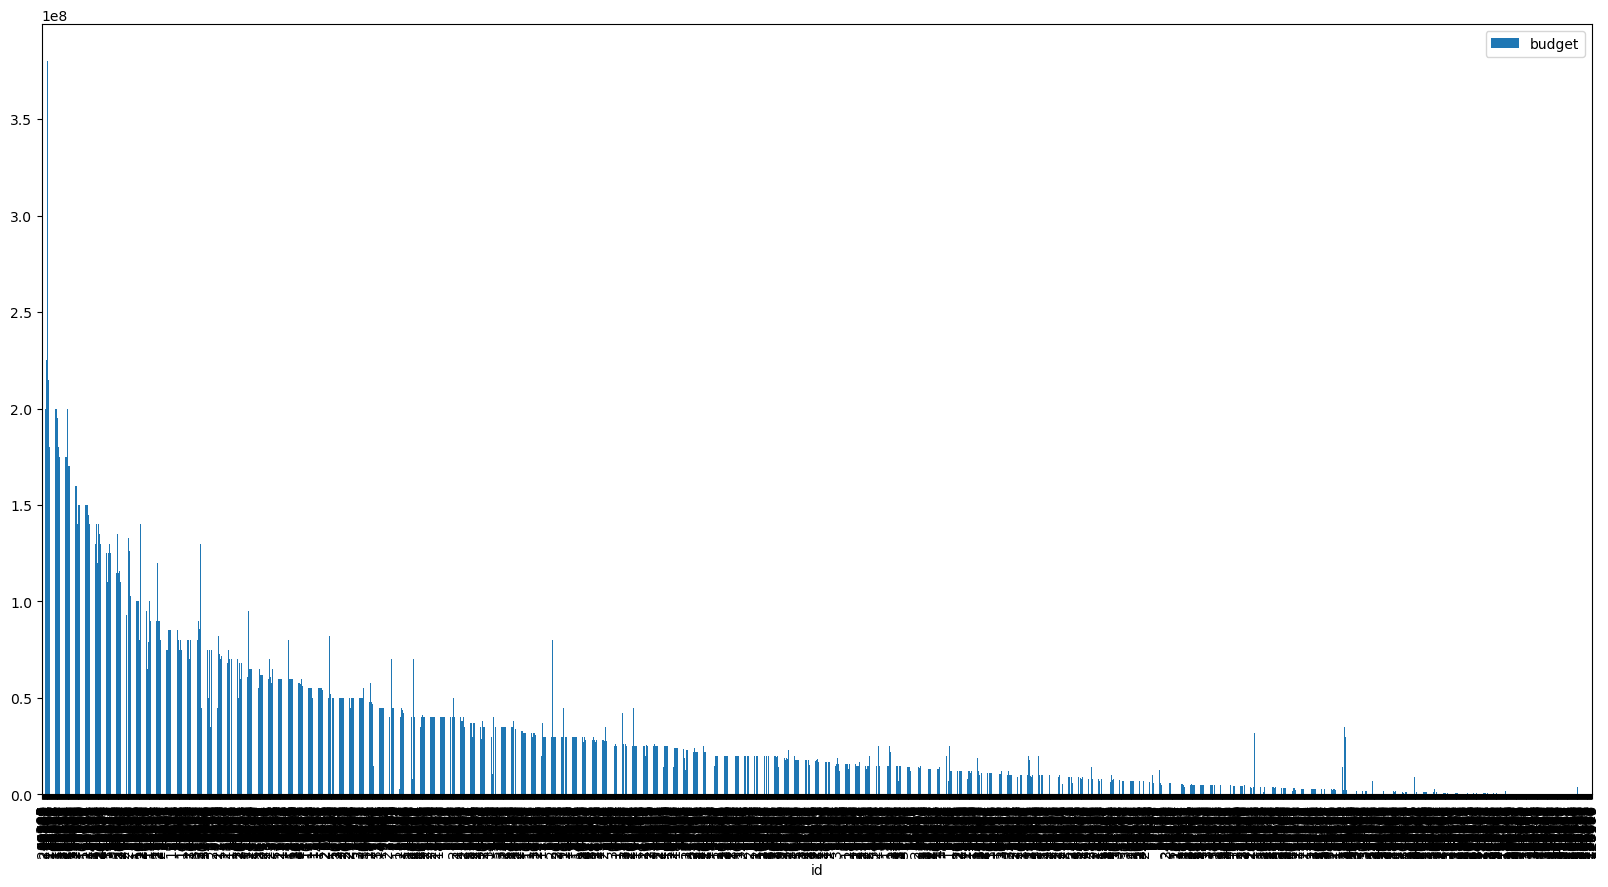

In [6]:
#Plot the column
data.plot.bar(x='id',y='budget', figsize=(20,10), rot=90)

Genre

In [5]:
#functions to extract the dictionary format of the dataset into useful lists
def get_ID_Value_List(feature):
    feature_dict = []
    for movie in feature:
        feature_dict.append(eval(movie))

    feature_ID_Value = []
    for movie in feature_dict:
        for d in movie:
            for k in d:
                if d.get(k) not in feature_ID_Value:
                    feature_ID_Value.append(d.get(k))
    return feature_ID_Value

def get_feature_dictionary(features):
    i = 0
    features_dict = {}
    while i < len(features):
        features_dict[features[i]] = features[i+1]
        i = i+2
    return features_dict

def replace_features(feature, df_feature):
    feature_dict = []
    for movie in df_feature:
        feature_dict.append(eval(movie))
    features = []
    for movie in feature_dict:
        movie_feature = []
        for d in movie:
            for k in d:
                if k == "name":
                    break
                else:
                    i = d.get(k)
                movie_feature.append(feature.get(i))
        features.append(movie_feature)
    return features
data.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [6]:
#transform genres
genre = get_ID_Value_List(data.genres)
print(genre)
genre = get_feature_dictionary(genre)

[28, 'Action', 12, 'Adventure', 14, 'Fantasy', 878, 'Science Fiction', 80, 'Crime', 18, 'Drama', 53, 'Thriller', 16, 'Animation', 10751, 'Family', 37, 'Western', 35, 'Comedy', 10749, 'Romance', 27, 'Horror', 9648, 'Mystery', 36, 'History', 10752, 'War', 10402, 'Music', 99, 'Documentary', 10769, 'Foreign', 10770, 'TV Movie']


In [7]:
genre

{28: 'Action',
 12: 'Adventure',
 14: 'Fantasy',
 878: 'Science Fiction',
 80: 'Crime',
 18: 'Drama',
 53: 'Thriller',
 16: 'Animation',
 10751: 'Family',
 37: 'Western',
 35: 'Comedy',
 10749: 'Romance',
 27: 'Horror',
 9648: 'Mystery',
 36: 'History',
 10752: 'War',
 10402: 'Music',
 99: 'Documentary',
 10769: 'Foreign',
 10770: 'TV Movie'}

In [8]:
#overwrite genre with only names
genres = replace_features(genre, data.genres)
data['genres'] = genres
data.genres[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

Keywords

In [9]:
# transform keywords into right format
keywords = get_ID_Value_List(data.keywords)
keywords = get_feature_dictionary(keywords)
keywords

{1463: 'culture clash',
 2964: 'future',
 3386: 'space war',
 3388: 'space colony',
 3679: 'society',
 3801: 'space travel',
 9685: 'futuristic',
 9840: 'romance',
 9882: 'space',
 9951: 'alien',
 10148: 'tribe',
 10158: 'alien planet',
 10987: 'cgi',
 11399: 'marine',
 13065: 'soldier',
 14643: 'battle',
 14720: 'love affair',
 165431: 'anti war',
 193554: 'power relations',
 206690: 'mind and soul',
 209714: '3d',
 270: 'ocean',
 726: 'drug abuse',
 911: 'exotic island',
 1319: 'east india trading company',
 2038: "love of one's life",
 2052: 'traitor',
 2580: 'shipwreck',
 2660: 'strong woman',
 3799: 'ship',
 5740: 'alliance',
 5941: 'calypso',
 6155: 'afterlife',
 6211: 'fighter',
 12988: 'pirate',
 157186: 'swashbuckler',
 179430: 'aftercreditsstinger',
 470: 'spy',
 818: 'based on novel',
 4289: 'secret agent',
 9663: 'sequel',
 14555: 'mi6',
 156095: 'british secret service',
 158431: 'united kingdom',
 849: 'dc comics',
 853: 'crime fighter',
 949: 'terrorist',
 1308: 'secret 

In [10]:
# Overwrite keywords column with only names
keywords = replace_features(keywords,data.keywords)
data['keywords'] = keywords
data['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

Original Language

In [11]:
#Get an overview of the movie languages
data['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [12]:
#check if descriptions are in english even if the language is not english
data[data['original_language'] != "en"]

budget                                             genres  \
97    15000000  [Action, Adventure, Drama, Horror, Science Fic...   
235   97250400               [Fantasy, Adventure, Comedy, Family]   
317   94000000                              [Drama, History, War]   
474          0                           [Mystery, Drama, Horror]   
492    8000000                                [Comedy, Animation]   
...        ...                                                ...   
4739         0                                  [Comedy, Romance]   
4751         0                                   [Drama, Romance]   
4790         0                                   [Drama, Foreign]   
4792     20000                 [Crime, Horror, Mystery, Thriller]   
4798    220000                          [Action, Crime, Thriller]   

                                               homepage      id  \
97                                                  NaN  315011   
235   http://www.asterixauxjeuxolympiques.com/index.php    2395   
317                http://www.theflowersofwarmovie.com/   76758   
474                                                 NaN  330770   
492                                                 NaN  293644   
...                                                 ...     ...   
4739                                                NaN   90414   
4751                                                NaN   42109   
4790                                                NaN   13898   
4792                                                NaN   36095   
4798                                                NaN    9367   

                                               keywords original_language  \
97    [monster, godzilla, giant monster, destruction...                ja   
235   [competition, greece, colosseum, olympic games...                fr   
317                   [forced prostitution, child rape]                zh   
474   [nurse, sea, beach, boy, pregnant, blood, woma...                fr   
492                                                [3d]                es   
...                                                 ...               ...   
4739                                   [woman director]                fr   
4751                                                 []                pt   
4790                                                 []                fa   
4792  [japan, prostitute, hotel, based on novel, hal...                ja   
4798  [united states–mexico barrier, legs, arms, pap...                es   

                          original_title  \
97                                シン・ゴジラ   
235          Astérix aux Jeux Olympiques   
317                                金陵十三釵   
474                            Évolution   
492   Don Gato: El inicio de la pandilla   
...                                  ...   
4739         I Love You, Don't Touch Me!   
4751            Gabriela, Cravo e Canela   
4790                               دایره   
4792                                 キュア   
4798                         El Mariachi   

                                               overview  popularity  \
97    From the mind behind Evangelion comes a hit la...    9.476999   
235   Astérix and Obélix have to win the Olympic Gam...   20.344364   
317   A Westerner finds refuge with a group of women...   12.516546   
474   11-year-old Nicolas lives with his mother in a...    3.300061   
492   Top Cat has arrived to charm his way into your...    0.719996   
...                                                 ...         ...   
4739  The story of a 25 year old virgin girl, lookin...    0.020839   
4751  In 1925, Gabriela becomes cook, mistress, and ...    0.557602   
4790  Various women struggle to function in the oppr...    1.193779   
4792  A wave of gruesome murders is sweeping Tokyo. ...    0.212443   
4798  El Mariachi just wants to play his guitar and ...   14.269792   

                                   production_companies  \
97    [{

Original Title

In [13]:
#check for nan values
data.original_title.isna().sum()

0

Overview

In [14]:
#check for nan and replace with empty string
data.overview.isna().sum()

3

In [15]:
data.overview.fillna('', inplace=True)

Popularity

In [16]:
data.popularity.isna().sum()

0

Production Companies

In [17]:
# function to get the values out of the dictionary in the dataset.  
# need to edit the old function because the dictionary is different
def replace_features_new(df_feature):
    feature_dict = []
    for movie in df_feature:
        feature_dict.append(eval(movie))
    features = []
    for movie in feature_dict:
        movie_feature = []
        for d in movie:
            for k in d:
                if k == 'name':
                    movie_feature.append(d.get(k))
        features.append(movie_feature)
    return features

In [18]:
# get values out  of dictionary and change in dataset
prod_comp = get_ID_Value_List(data.production_companies)

In [19]:
prod_comp = replace_features_new(data.production_companies)

In [20]:
data['production_companies'] = prod_comp

Production Countries

In [21]:
# get values out  of dictionary and change in dataset
data['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [22]:
data.production_countries.isna().sum()

0

In [23]:
prod_count = replace_features_new(data.production_countries)
data['production_countries'] = prod_count
data.production_countries

0       [United States of America, United Kingdom]
1                       [United States of America]
2       [United Kingdom, United States of America]
3                       [United States of America]
4                       [United States of America]
                           ...                    
4798            [Mexico, United States of America]
4799                                            []
4800                    [United States of America]
4801             [United States of America, China]
4802                    [United States of America]
Name: production_countries, Length: 4803, dtype: object

Release Date

In [24]:
#get overview and transform date into datetime format.
data['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [25]:
data.release_date.isna().sum()

1

In [26]:
data[data['release_date'].isna()]

budget genres homepage      id keywords original_language  \
4553       0     []      NaN  380097       []                en   

                  original_title  \
4553  America Is Still the Place   

                                               overview  popularity  \
4553  1971 post civil rights San Francisco seemed li...         0.0   

     production_companies production_countries release_date  revenue  runtime  \
4553                   []                   []          NaN        0      0.0   

     spoken_languages    status tagline                       title  \
4553               []  Released     NaN  America Is Still the Place   

      vote_average  vote_count  
4553           0.0           0

In [27]:
data.release_date = pd.to_datetime(data['release_date'], format='%Y-%m-%d')
data.release_date.head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

Revenue

In [28]:
#check for nan values
print(data.revenue.info())
print(data.revenue.isna().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: revenue
Non-Null Count  Dtype
--------------  -----
4803 non-null   int64
dtypes: int64(1)
memory usage: 37.6 KB
None
0


In [29]:
data.revenue.sort_values().value_counts()

0             1427
8000000          6
7000000          6
100000000        5
6000000          5
              ... 
26288320         1
26527510         1
26673242         1
26781723         1
2787965087       1
Name: revenue, Length: 3297, dtype: int64

Runtime

<AxesSubplot:>

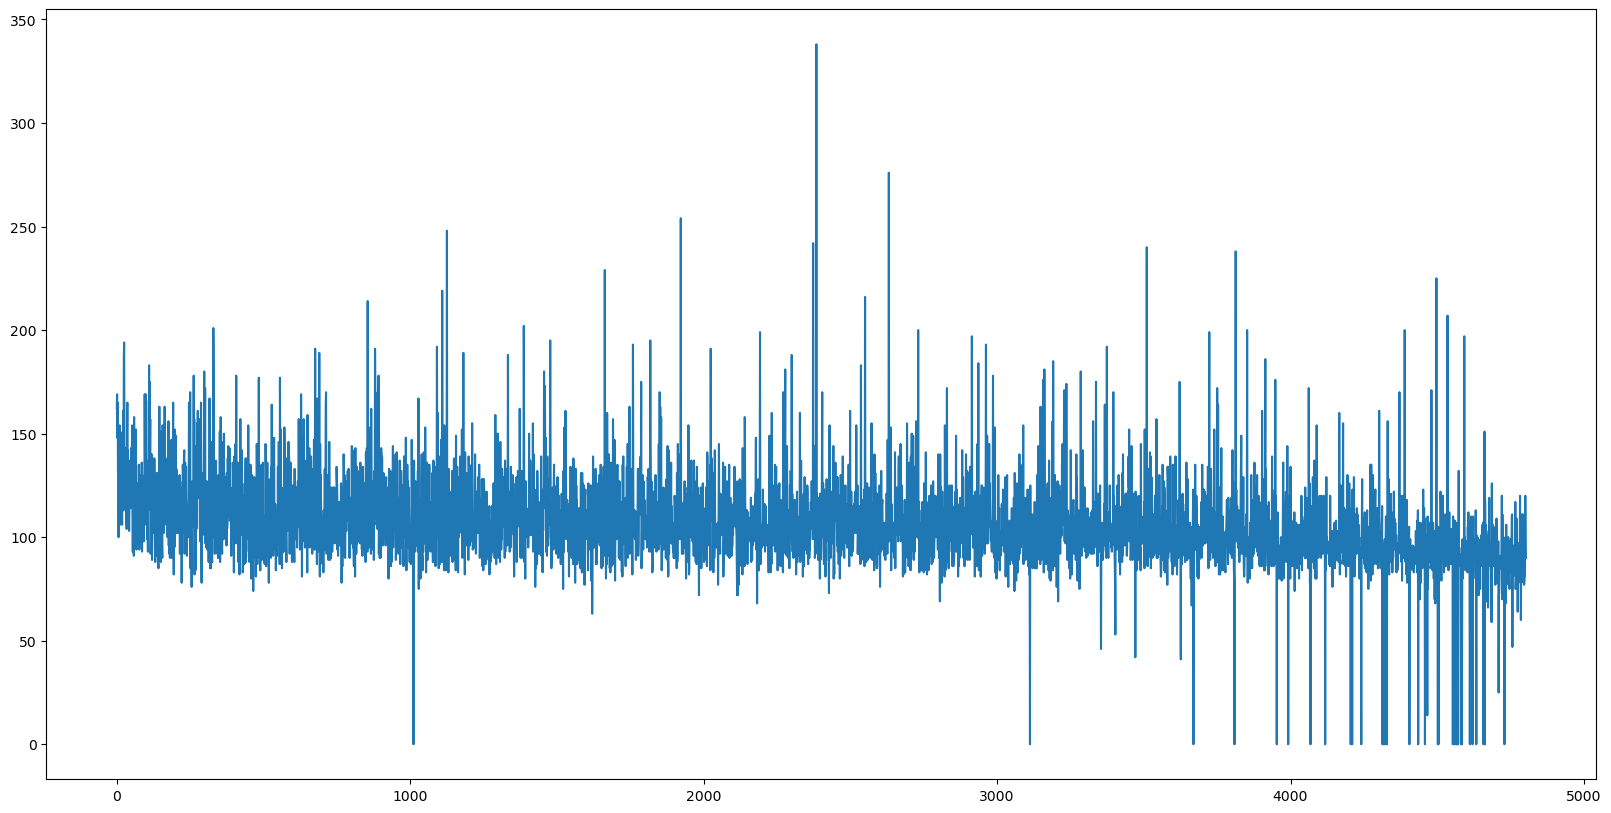

In [32]:
#Plot the runtime
# most movies between 100 and 150 some above and some below
data.runtime.plot(figsize=(20,10))

Spoken_Languages

In [30]:
#replace dictionary with only the names of the languages.
data.spoken_languages
spo_lang = replace_features_new(data.spoken_languages)
spo_lang[2]

['Français', 'English', 'Español', 'Italiano', 'Deutsch']

In [31]:
data.spoken_languages[2]

'[{"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "de", "name": "Deutsch"}]'

In [32]:
data['spoken_languages'] = spo_lang

Status

In [33]:
data.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

Tagline

In [34]:
# check for nan values and replace them with an empty string
data.tagline.head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [35]:
data.tagline.isna().sum()

844

In [36]:
data.tagline.fillna('', inplace=True)

Title

In [37]:
data.title.isna().sum()

0

Vote Average

In [38]:
data.vote_average.isna().sum()

0

<AxesSubplot:>

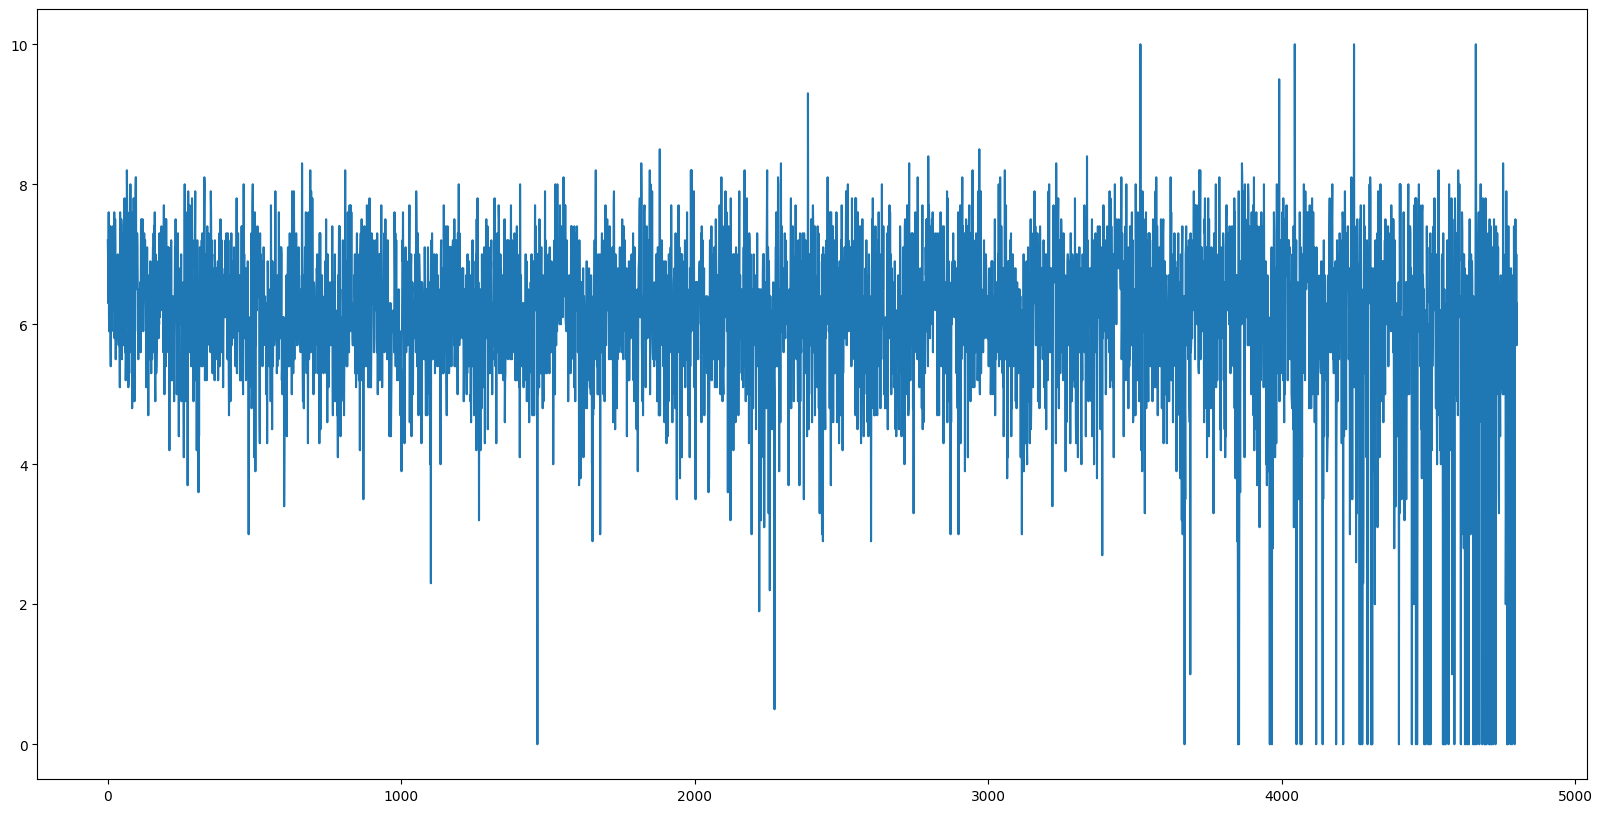

In [39]:
# Plot to get an general overview
# Most movies between 4 and 8 some above some 0
data.vote_average.plot(figsize=(20,10))

Vote Count

In [40]:
data.vote_count.isna().sum()

0

<AxesSubplot:>

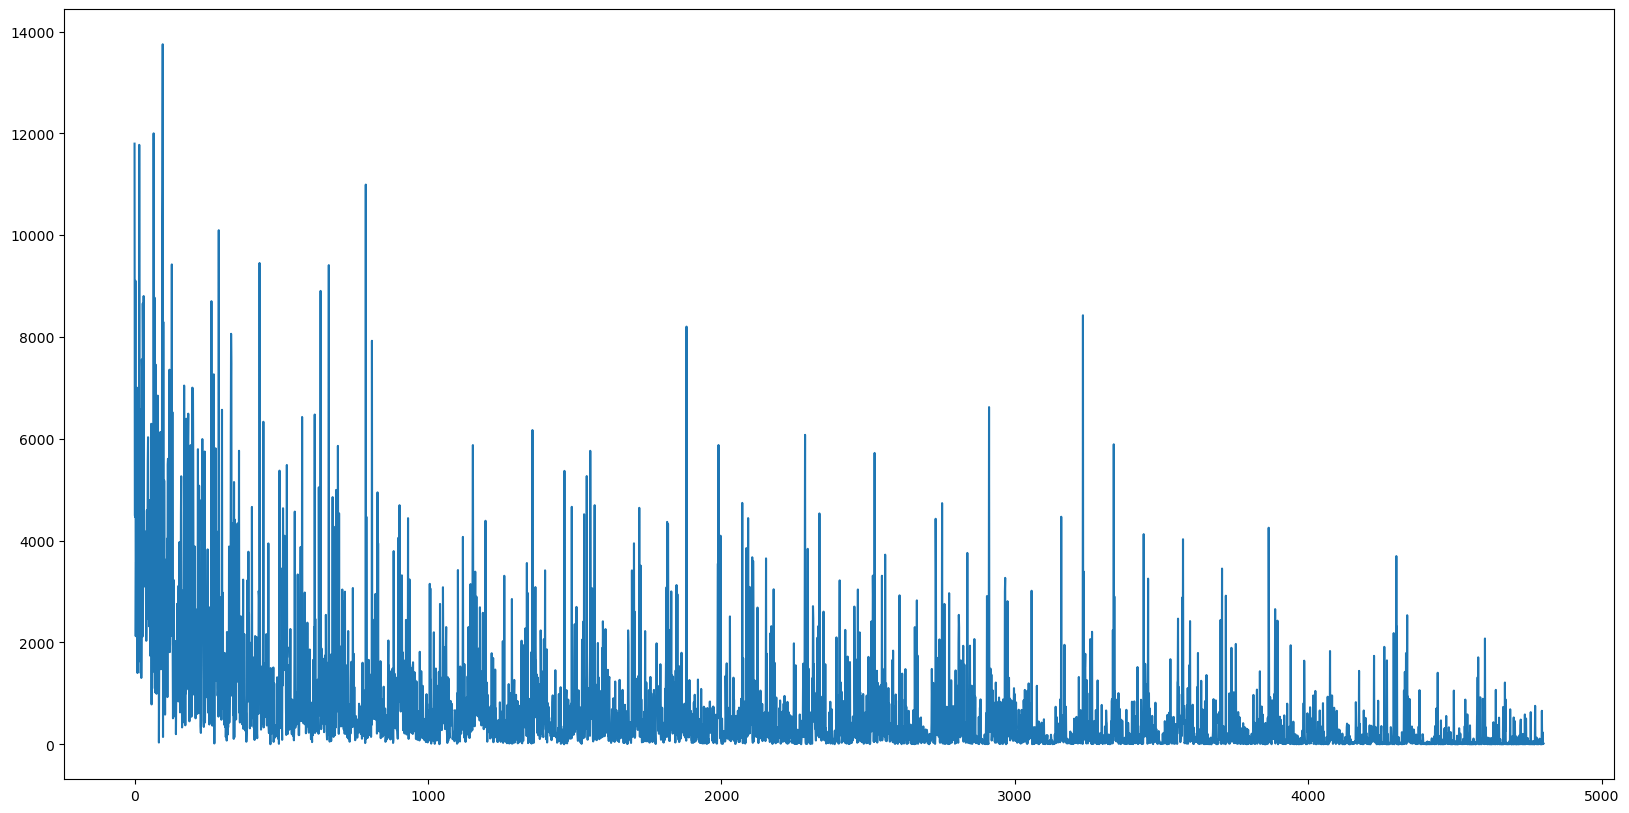

In [44]:
# Plot to get an general overview
data.vote_count.plot(figsize=(20,10))

In [41]:
# Get an overview of the numerical columns description
data.describe().round(2)

budget         id  popularity       revenue  runtime  \
count  4.803000e+03    4803.00     4803.00  4.803000e+03  4801.00   
mean   2.904504e+07   57165.48       21.49  8.226064e+07   106.88   
std    4.072239e+07   88694.61       31.82  1.628571e+08    22.61   
min    0.000000e+00       5.00        0.00  0.000000e+00     0.00   
25%    7.900000e+05    9014.50        4.67  0.000000e+00    94.00   
50%    1.500000e+07   14629.00       12.92  1.917000e+07   103.00   
75%    4.000000e+07   58610.50       28.31  9.291719e+07   118.00   
max    3.800000e+08  459488.00      875.58  2.787965e+09   338.00   

       vote_average  vote_count  
count       4803.00     4803.00  
mean           6.09      690.22  
std            1.19     1234.59  
min            0.00        0.00  
25%            5.60       54.00  
50%            6.20      235.00  
75%            6.80      737.00  
max           10.00    13752.00

In [42]:
vote_mean = data.vote_average.mean()
print(vote_mean)
budget_mean = data.budget.mean()
print(budget_mean)

6.092171559442016
29045039.87528628


In [43]:
# Find out the dislike and like sentiment according to the mean value of vote_average, 0 is dislike and 1 is like
data['Liked'] = data['vote_average'].apply(lambda value: 0 if value <= vote_mean else 1 if value > vote_mean else 'medium')

# Find out the low and high budget sentiment according to the mean value of budget, 0 is low budget and 1 is high budget
data['Cost Level'] = data['budget'].apply(lambda value: '0' if value <= budget_mean else '1' if value > budget_mean else 'medium')
data

budget                                         genres  \
0     237000000  [Action, Adventure, Fantasy, Science Fiction]   
1     300000000                   [Adventure, Fantasy, Action]   
2     245000000                     [Action, Adventure, Crime]   
3     250000000               [Action, Crime, Drama, Thriller]   
4     260000000           [Action, Adventure, Science Fiction]   
...         ...                                            ...   
4798     220000                      [Action, Crime, Thriller]   
4799       9000                              [Comedy, Romance]   
4800          0             [Comedy, Drama, Romance, TV Movie]   
4801          0                                             []   
4802          0                                  [Documentary]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [culture clash, future, space war, space colon...                en   
1     [ocean, drug abuse, exotic island, east india ...                en   
2     [spy, based on novel, secret agent, sequel, mi...                en   
3     [dc comics, crime fighter, terrorist, secret i...                en   
4     [based on novel, mars, medallion, space travel...                en   
...                                                 ...               ...   
4798  [united states–mexico barrier, legs, arms, pap...                es   
4799                                                 []                en   
4800  [date, love at first sight, narration, investi...                en   
4801                                                 []                en   
4802          [obsession, camcorder, crush, dream girl]                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ...    1.929883   

                                

In [44]:
# Find the pairwise correlation of all the numerical columns in the dataset
data.corr(method='pearson')

budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   
Liked         0.035926 -0.141871    0.211466  0.163047  0.304438   

              vote_average  vote_count     Liked  
budget            0.093146    0.593180  0.035926  
id               -0.270595   -0.004128 -0.141871  
popularity        0.273952    0.778130  0.211466  
revenue           0.197150    0.781487  0.163047  
runtime           0.375046    0.271944  0.304438  
vote_average      1.000000    0.312997  0.698724  
vote_count        0.312997    1.000000  0.252808  
Liked             0.698724    0.252808  1.000000

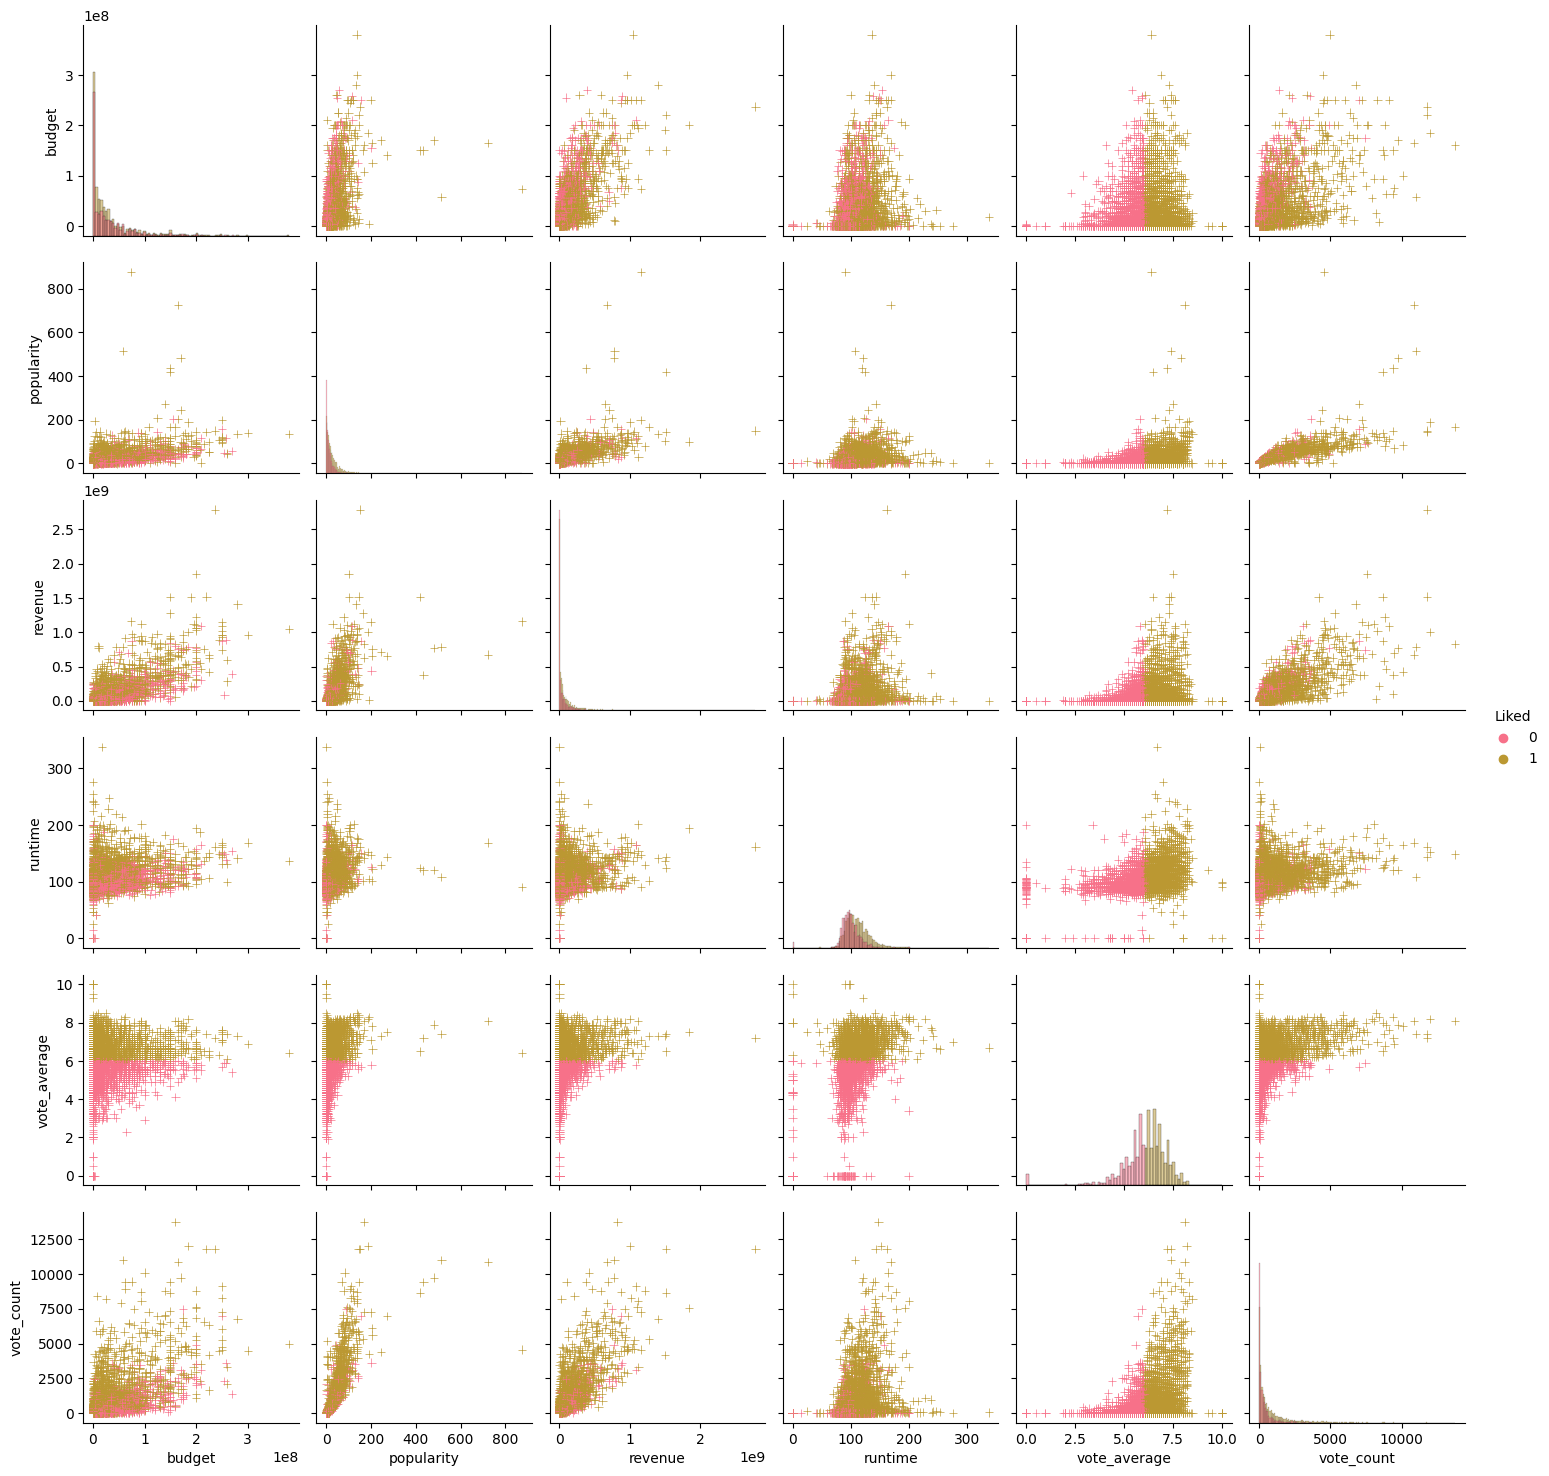

In [44]:
# Visualize the correlation of the numerical columns
sns.set_palette('husl')
%matplotlib inline

tmp = data.drop('id', axis=1)
g = sns.pairplot(tmp, hue='Liked', markers='+', diag_kind='hist')
plt.show()

#### Create column 'Description' by concatenating column 'tagline' and 'overview' ####

In [45]:
# Create a new column ‘description’ by concatenating the strings from two columns: tagline and overview
data['Description'] = data['overview'] + data['tagline']
data.head()

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   162.0   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...   169.0   
2                   [Columbia Pictures, Danjaq, B24]  ...   148.0   
3  [Legendary Pictures, Warner Bros., DC Entertai...  ...   165.0   
4                             [Walt Disney Pictures]  ...   132.0   

                                  spoken_languages    status  \
0                               [English, Español]  Released   
1                                        [English]  Released   
2  [Français, English, Español, Italiano, Deutsch]  Released   
3                                        [English]  Released   
4                                        [English]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count Liked  \
0                                    Avatar          7.2      11800     1   
1  Pirates of the Caribbean: At World's End          6.9       4500     1   
2                                   Spectre          6.3       4466     1   
3                     The Dark Knight Rises          7.6       9106     1   
4                               John Carter          6.1       2124     1   

   Cost Level                                        Description  
0           1  In the 22nd century, a paraplegic Marine is di...  
1           1  Captain Barbossa, long believed to be dead, ha...  
2           1  A cryptic message from Bond’s past sends him o...  
3           1  Following the death of District Attorney Harve...  
4           1  John Carter is a war-weary, former military ca...  

[5 rows x 23 columns]

#### 2.1.2 Text Processing ####

In [46]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [47]:
# importing libraries
stops = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

#preprocessing function for the documents
def preprocessing(document):
    temp = word_tokenize(document)
    temp = [word.lower() for word in temp]
    temp = [word.strip() for word in temp]
    temp = [word for word in temp if word not in stops]
    temp = [word for word in temp if word.isalnum()]
    temp = [lemmatizer.lemmatize(word) for word in temp]

    return temp

In [48]:
# preprocess description column and save the preprocessed version in the dataset
preprocessed_tokens = [preprocessing(sen) for sen in data.Description]
preprocessed = [(' ').join(document) for document in preprocessed_tokens]
data['Description'] = preprocessed
data.head()

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   162.0   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...   169.0   
2                   [Columbia Pictures, Danjaq, B24]  ...   148.0   
3  [Legendary Pictures, Warner Bros., DC Entertai...  ...   165.0   
4                             [Walt Disney Pictures]  ...   132.0   

                                  spoken_languages    status  \
0                               [English, Español]  Released   
1                                        [English]  Released   
2  [Français, English, Español, Italiano, Deutsch]  Released   
3                                        [English]  Released   
4                                        [English]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count Liked  \
0                                    Avatar          7.2      11800     1   
1  Pirates of the Caribbean: At World's End          6.9       4500     1   
2                                   Spectre          6.3       4466     1   
3                     The Dark Knight Rises          7.6       9106     1   
4                               John Carter          6.1       2124     1   

   Cost Level                                        Description  
0           1  22nd century paraplegic marine dispatched moon...  
1           1  captain barbossa long believed dead come back ...  
2           1  cryptic message bond past sends trail uncover ...  
3           1  following death district attorney harvey dent ...  
4           1  john carter former military captain inexplicab...  

[5 rows x 23 columns]

#### 2.1.3 TF and TF-IDF representation ####

TF-IDF

In [49]:
#create TF vectors 
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
tf_vector = tf_vectorizer.fit_transform(preprocessed)

In [50]:
#create TFIDF vectors
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2,stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(preprocessed)

In [51]:
vocab = tfidf_vectorizer.get_feature_names_out()
len(vocab)

9552

In [52]:
#create TF vector with word limit
tf_vectorizer2 = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
tf_vector2 = tf_vectorizer2.fit_transform(preprocessed)

In [53]:
#create TFIDF vector with word limit
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
tfidf_vector2 = tfidf_vectorizer2.fit_transform(preprocessed)

In [54]:
vocab2 = tfidf_vectorizer2.get_feature_names_out()
len(vocab2)

1000

#### 2.2 Practical Task: Topic modelling ####

#### LDA ####

In [55]:
#create LDiA Model for every vector
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(tf_vector)
lda_tf_matrix = lda_tf.transform(tf_vector)

In [56]:
lda_tf2 = LatentDirichletAllocation(n_components=10,random_state=0)
lda_tf2.fit(tf_vector2)
lda_tf_matrix2 = lda_tf2.transform(tf_vector2)

In [57]:
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(tfidf_vector)
lda_tfidf_matrix = lda_tfidf.transform(tfidf_vector)

In [58]:
lda_tfidf2 = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf2.fit(tfidf_vector2)
lda_tfidf_matrix2 = lda_tfidf2.transform(tfidf_vector2)

In [59]:
# plot_top_words to see the most valued words.
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    # plt.show()

    print(weights)

[ 35.19899293  35.26029543  39.28351757  39.57325393  42.63895714
  46.30304039  54.75820816  57.16553     59.96769304 101.20744429]


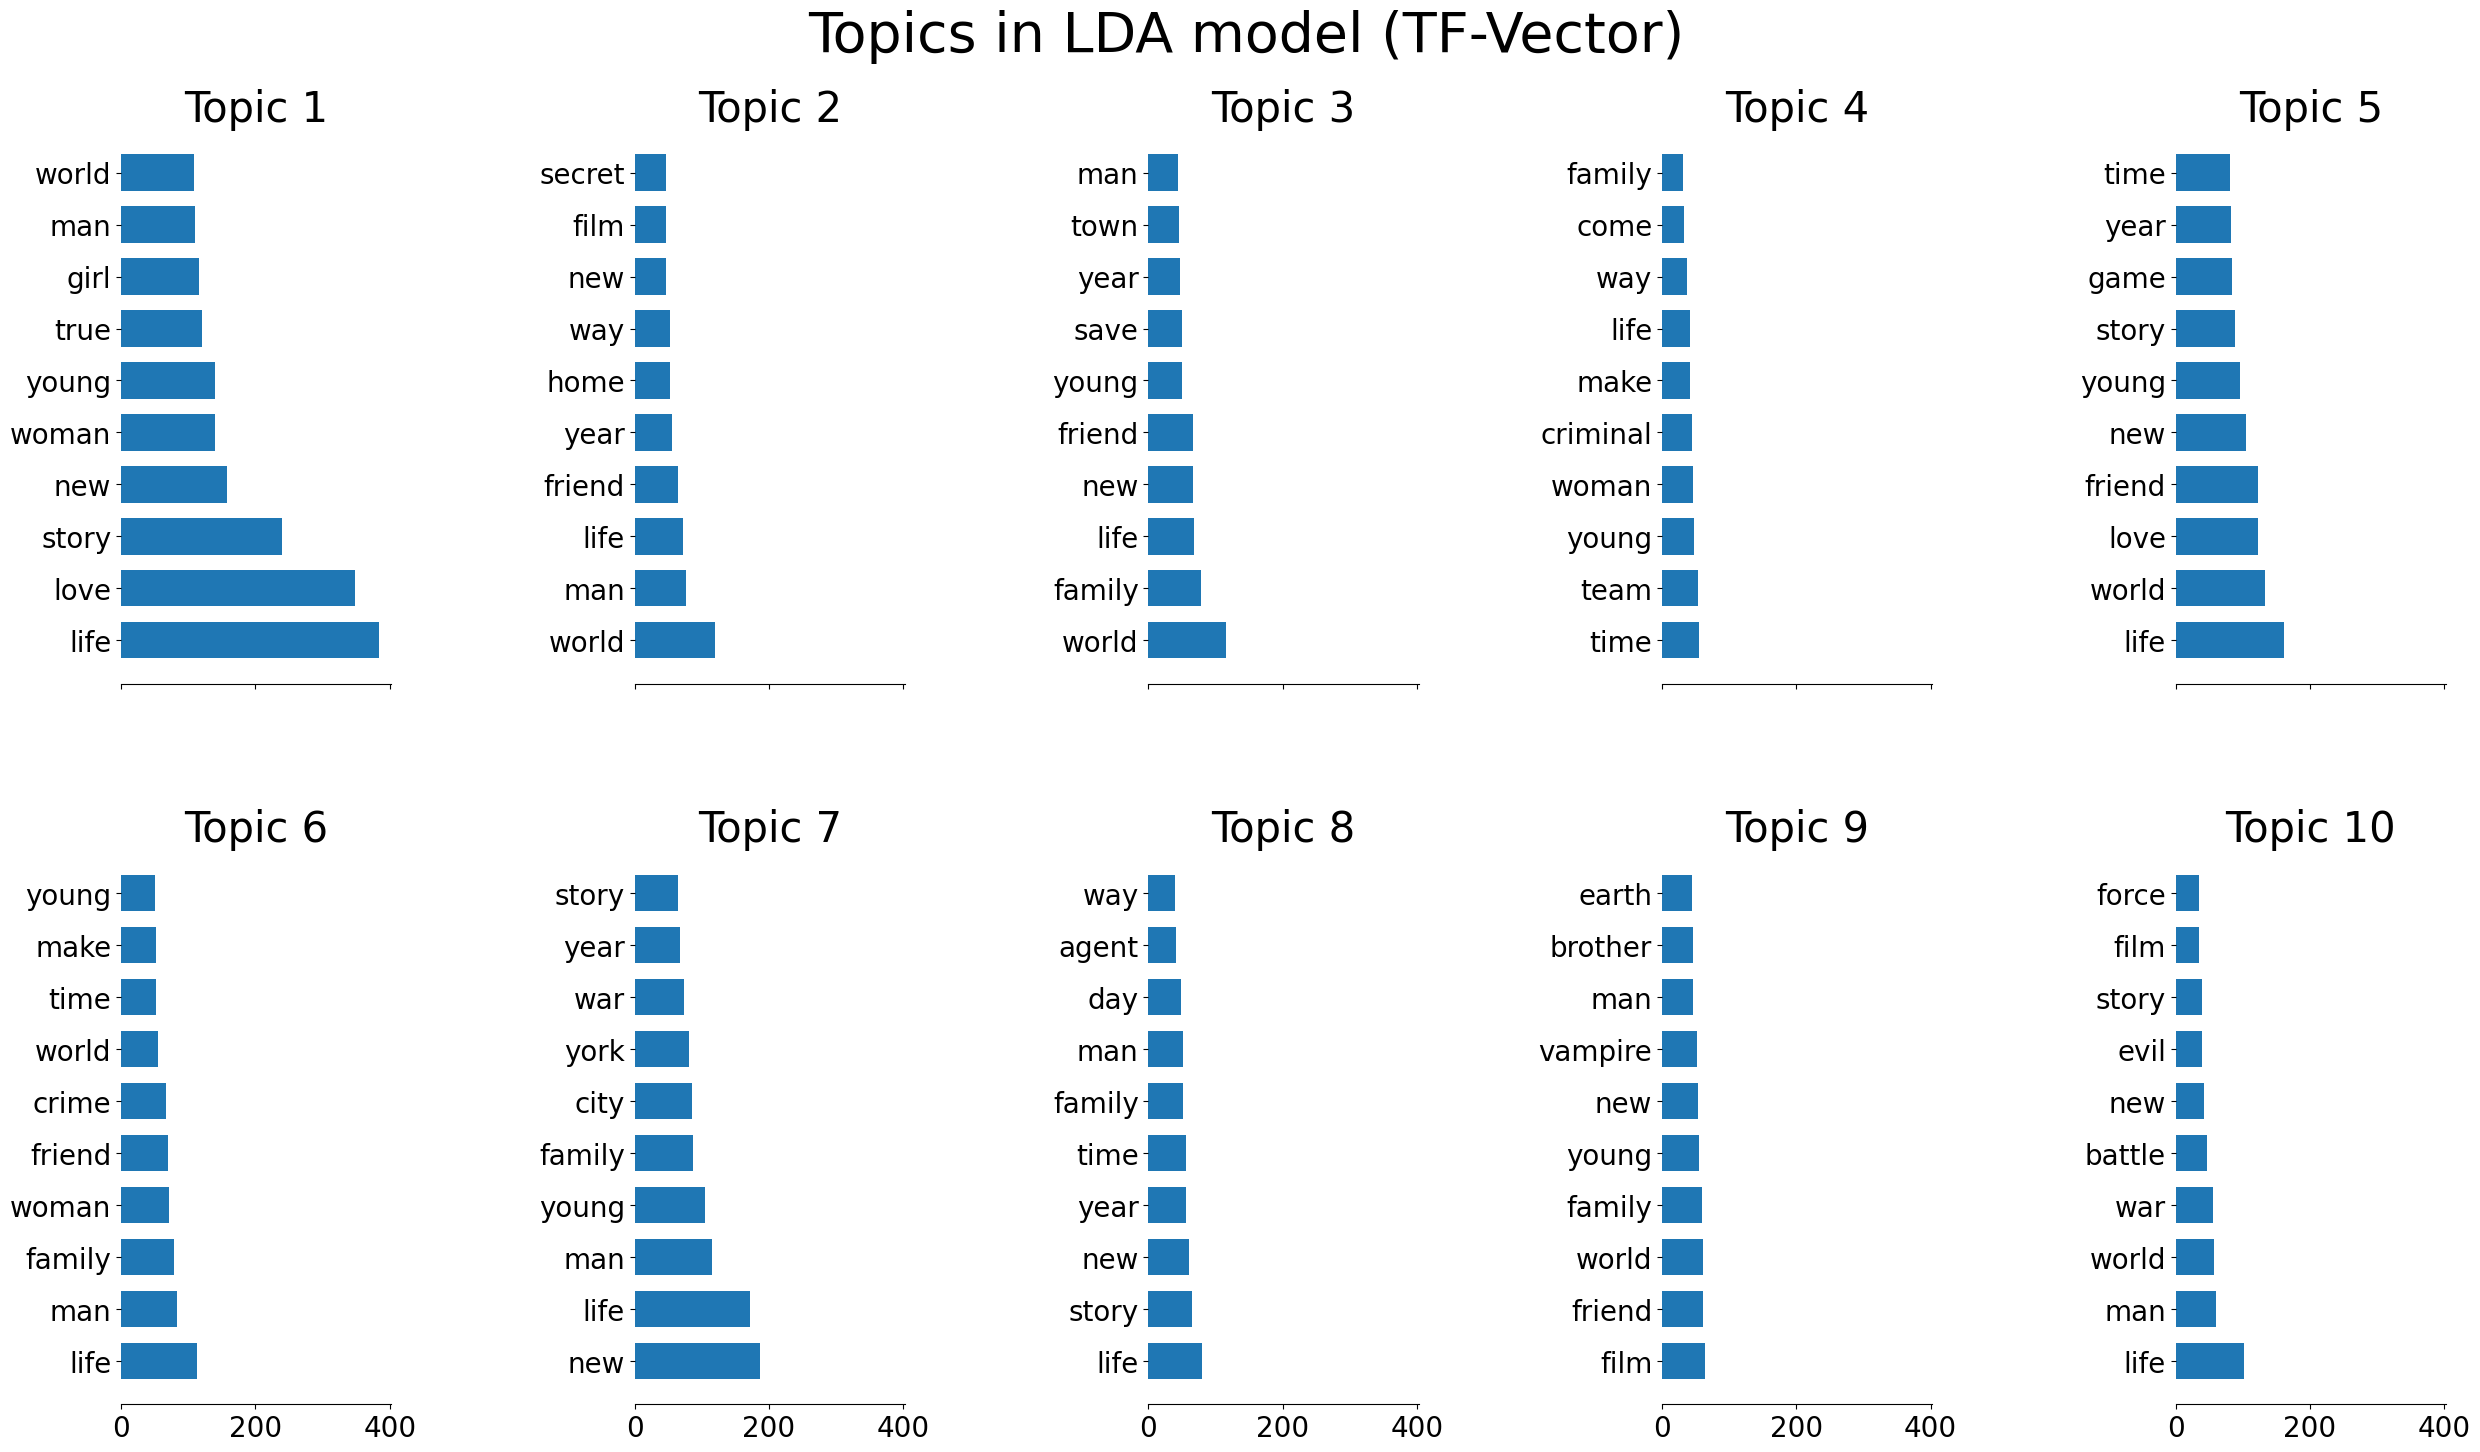

In [60]:
# show the most valued words for each vector
%matplotlib inline
plot_top_words(lda_tf, tf_vectorizer.get_feature_names_out(), 10, "Topics in LDA model (TF-Vector)")

[ 74.1166977   78.51203972  83.78998015  85.46681067  98.82238322
 103.08950081 105.52096344 108.73719689 120.99310362 130.92156698]


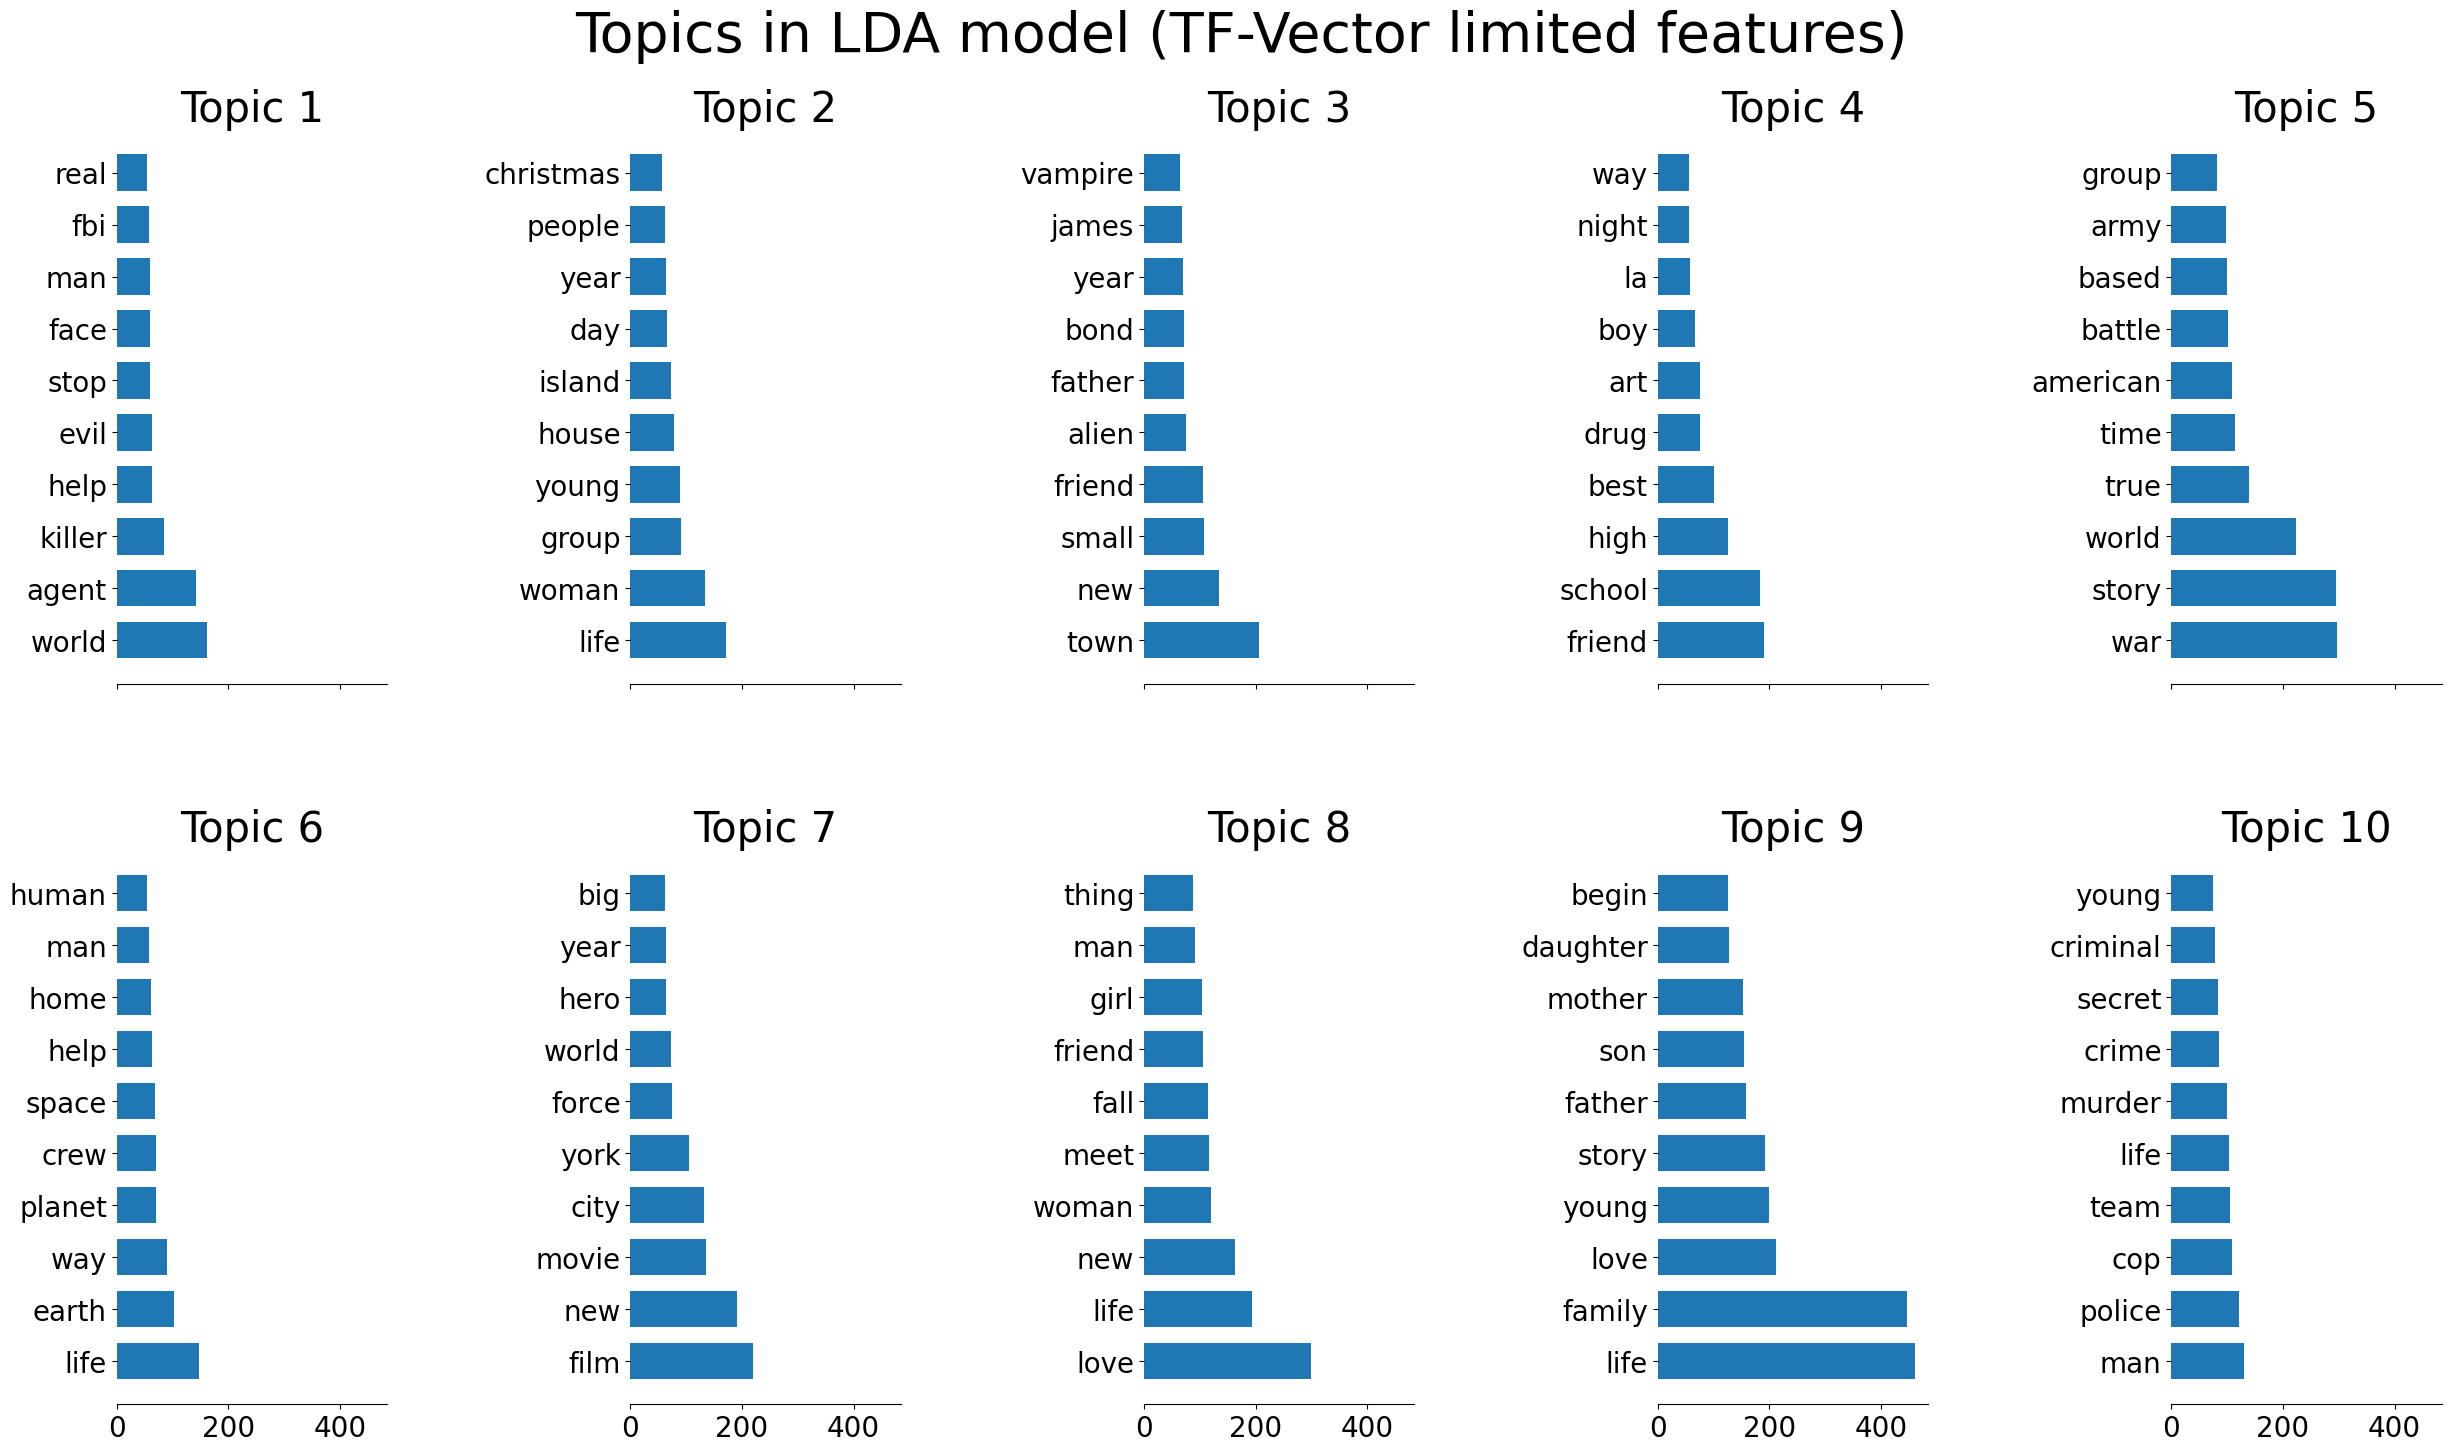

In [61]:
%matplotlib inline
plot_top_words(lda_tf2, tf_vectorizer2.get_feature_names_out(), 10, "Topics in LDA model (TF-Vector limited features)")

[3.06614609 3.20716965 3.32826445 3.35946933 3.45444231 3.48303272
 3.5848649  3.64398484 3.75803174 6.08220803]


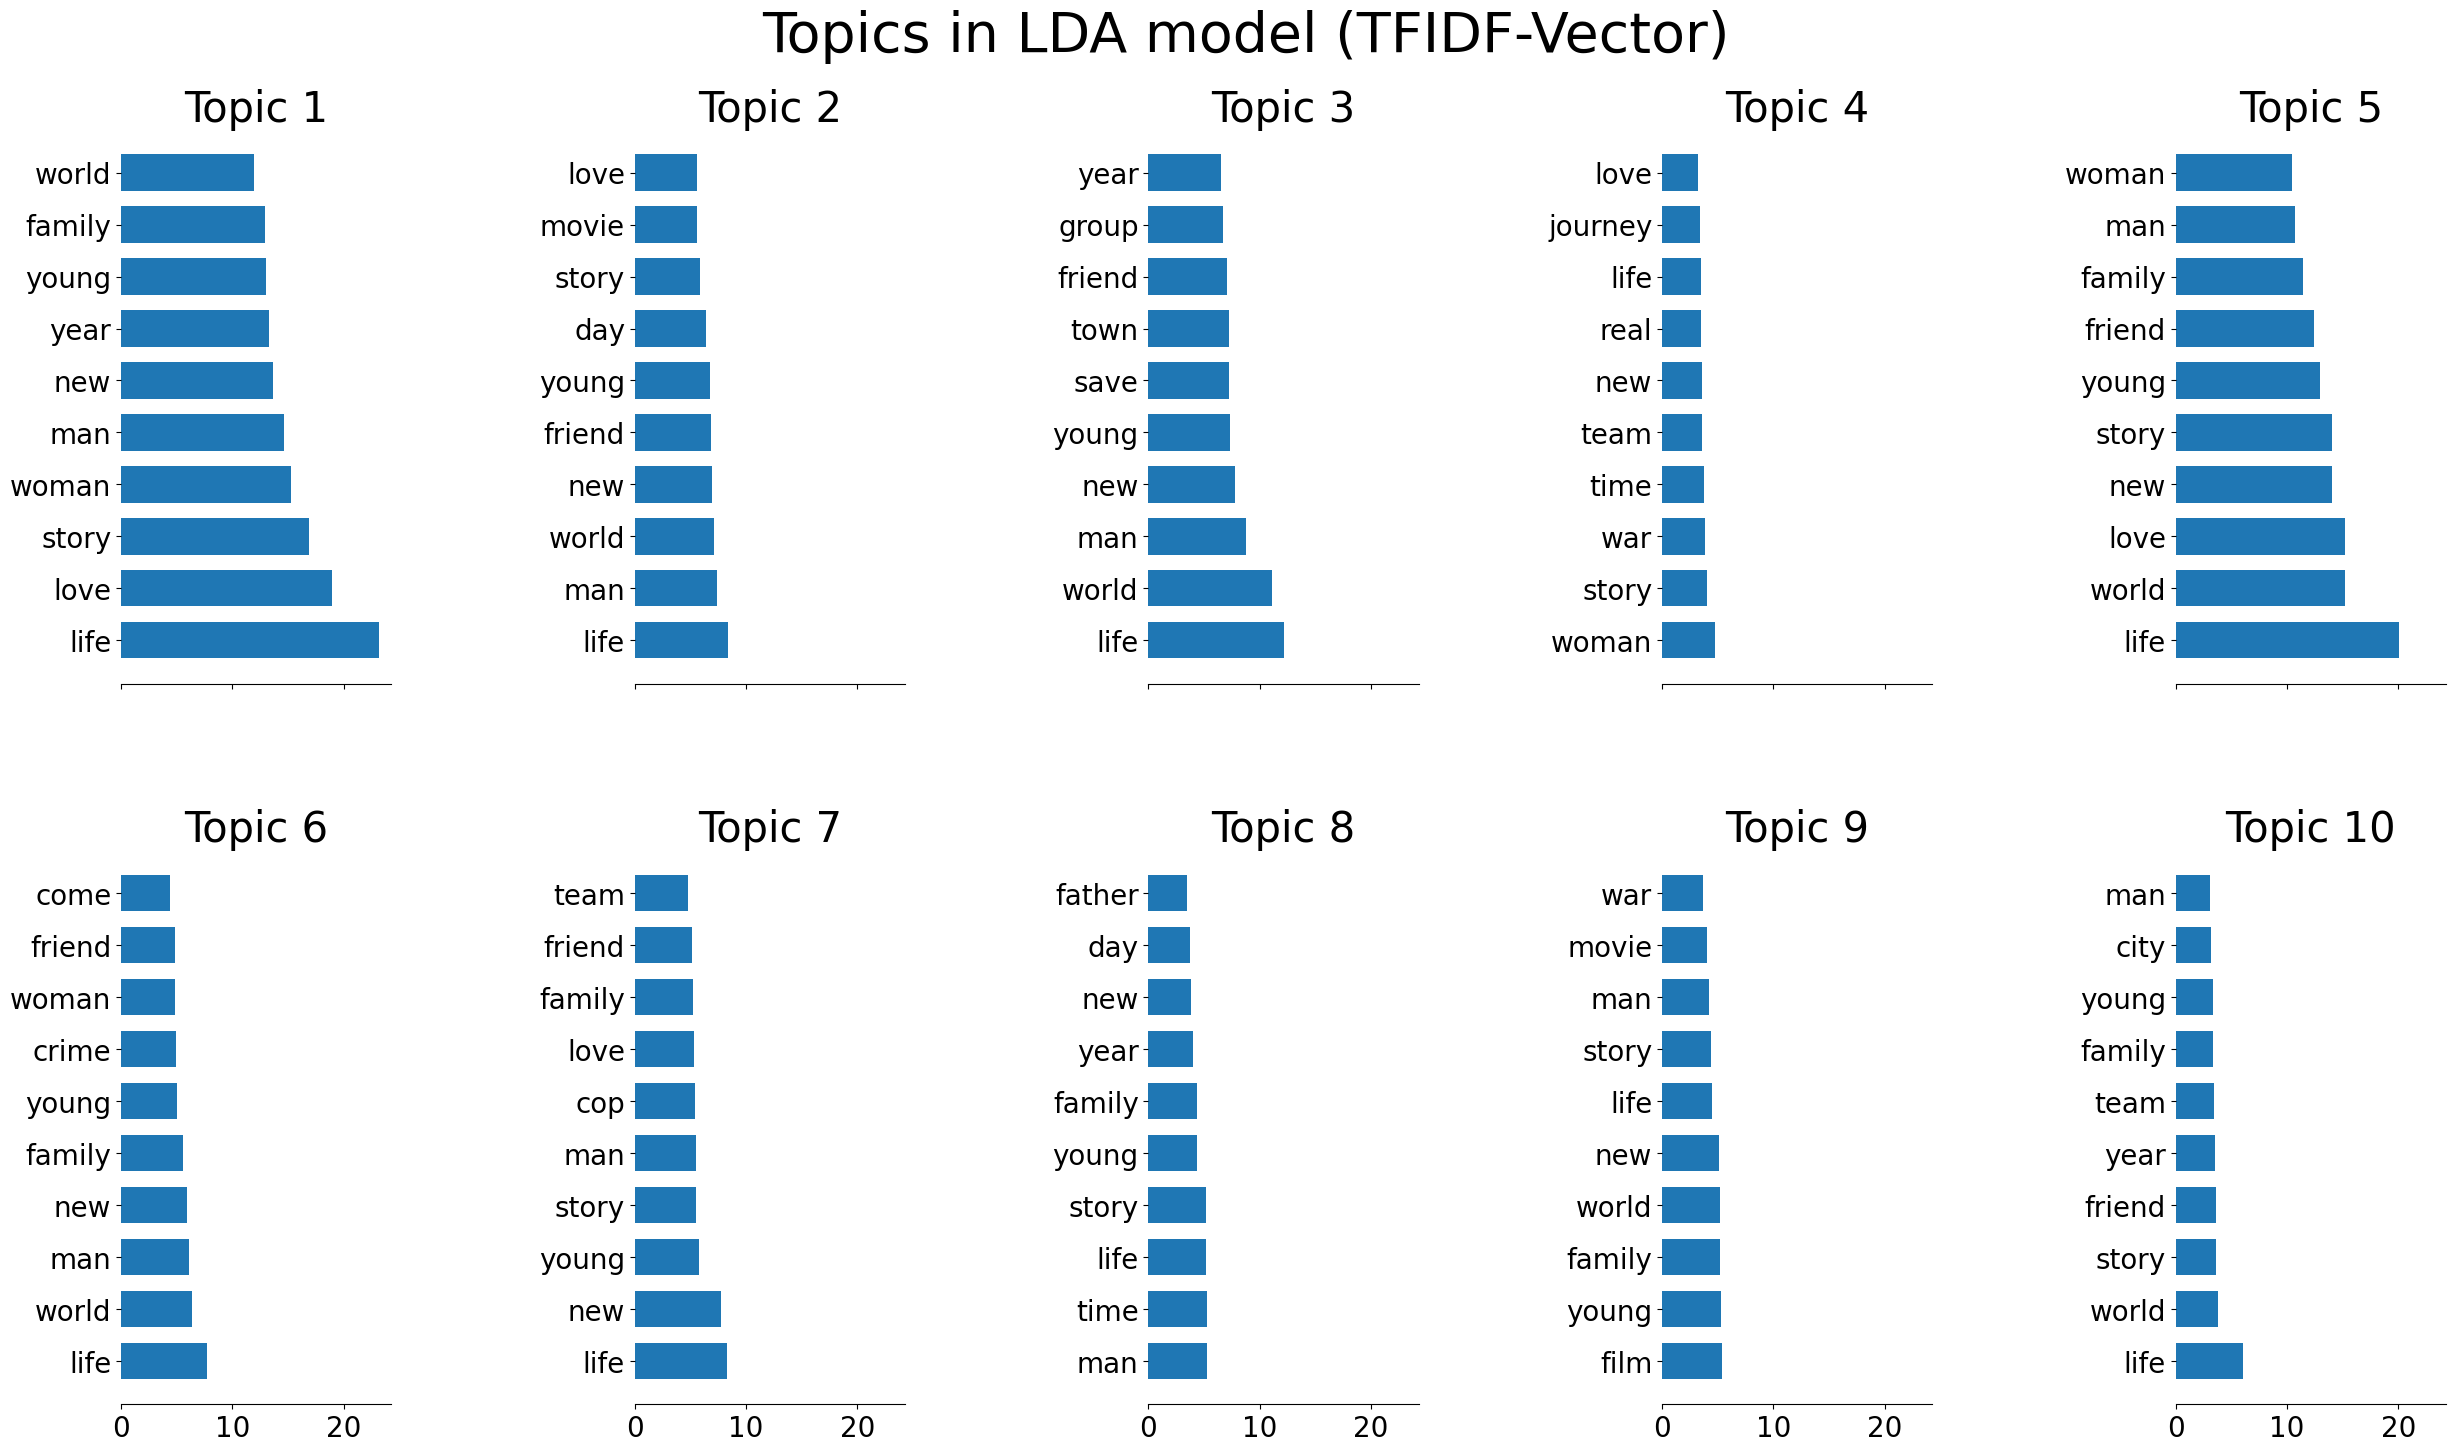

In [62]:
%matplotlib inline
plot_top_words(lda_tfidf, tfidf_vectorizer.get_feature_names_out(), 10, "Topics in LDA model (TFIDF-Vector)")

[17.13098501 17.54012973 17.7971539  19.00237498 19.33765664 20.12667862
 20.26112414 22.08465541 22.57057943 24.09288025]


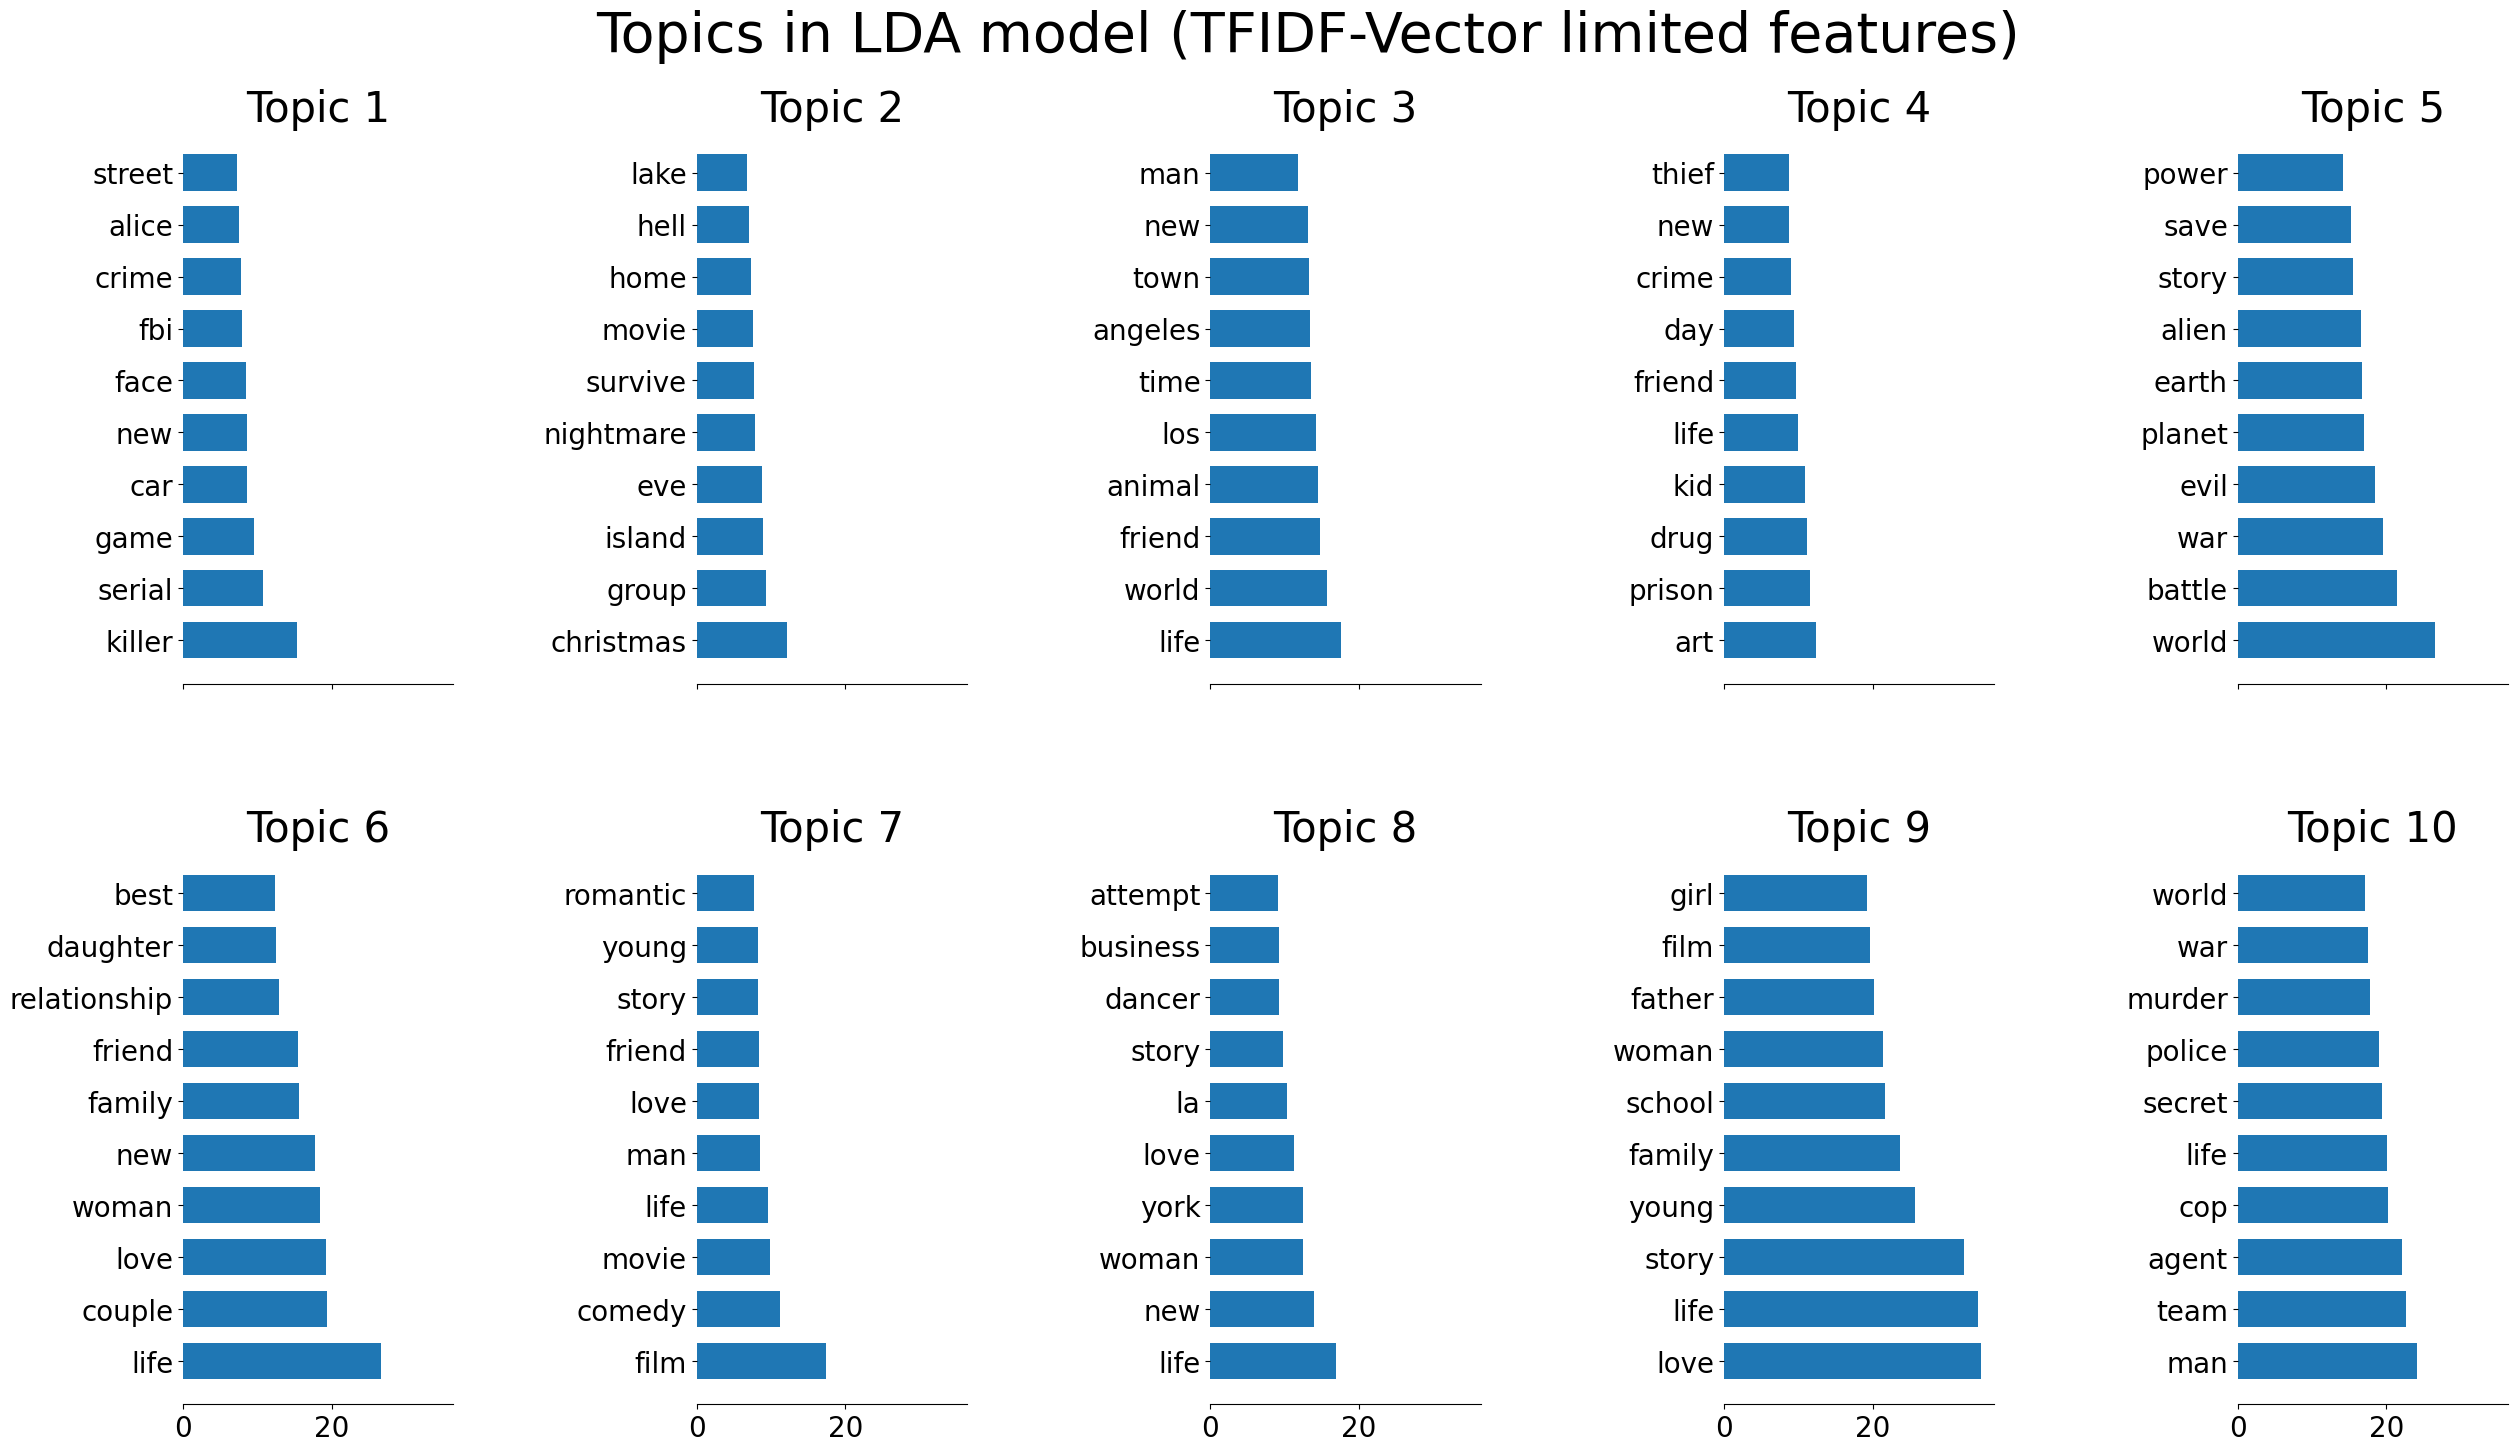

In [63]:
%matplotlib inline
plot_top_words(lda_tfidf2, tfidf_vectorizer2.get_feature_names_out(), 10, "Topics in LDA model (TFIDF-Vector limited features)")

In [64]:
#another option to see the most important words of each topic.
topics = []
for index, component in enumerate(lda_tfidf2.components_):
    zipped = zip(tfidf_vectorizer2.get_feature_names_out(), component)
    top_terms_key = sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list = list(dict(top_terms_key).keys())
    topics.append(top_terms_list)
for i in range(len(topics)):
    print("\nTopic",i+1)
    for word in topics[i]:
        print(word, end=", ")


Topic 1
killer, serial, game, car, new, face, fbi, crime, alice, street, 
Topic 2
christmas, group, island, eve, nightmare, survive, movie, home, hell, lake, 
Topic 3
life, world, friend, animal, los, time, angeles, town, new, man, 
Topic 4
art, prison, drug, kid, life, friend, day, crime, new, thief, 
Topic 5
world, battle, war, evil, planet, earth, alien, story, save, power, 
Topic 6
life, couple, love, woman, new, family, friend, relationship, daughter, best, 
Topic 7
film, comedy, movie, life, man, love, friend, story, young, romantic, 
Topic 8
life, new, woman, york, love, la, story, dancer, business, attempt, 
Topic 9
love, life, story, young, family, school, woman, father, film, girl, 
Topic 10
man, team, agent, cop, life, secret, police, murder, war, world, 

In [65]:
#visualization for LDiA Models to analyze it. With the slider a better insight of each topic is given 
#created for every vector
pyLDAvis.sklearn.prepare(lda_tf, tf_vector, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.115188  0.033319       1        1  16.513285
4      0.021379  0.022014       2        1  13.732771
6      0.039585 -0.013580       3        1  11.622527
1     -0.060225  0.030761       4        1   9.479825
2     -0.015205 -0.042671       5        1   9.456349
5      0.047435 -0.050466       6        1   8.921365
7     -0.013023 -0.003972       7        1   8.547997
8     -0.014275  0.111583       8        1   7.661407
3     -0.025411 -0.099020       9        1   7.088313
9     -0.095449  0.012032      10        1   6.976159, topic_info=         Term        Freq       Total Category  logprob  loglift
5155     love  603.000000  603.000000  Default  30.0000  30.0000
2066    crime  129.000000  129.000000  Default  29.0000  29.0000
9087  vampire   60.000000   60.000000  Default  28.0000  28.0000
3603     game  169.000000  169.000000  Default  27.0000  27.0000
3076     evil  173.000000  173.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
9523    young   27.636901  598.619257  Topic10  -5.7675  -0.4128
2918      end   21.104175  203.511339  Topic10  -6.0372   0.3964
7949     soon   20.131525  209.954079  Topic10  -6.0843   0.3181
4039     help   21.054350  312.636244  Topic10  -6.0395  -0.0353
1753     come   21.232737  370.764212  Topic10  -6.0311  -0.1974

[841 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
45        3  0.803694   1940
59        6  0.774765   1955
59        9  0.154953   1955
96        2  0.804148   1992
99        1  0.843310   1995
...     ...       ...    ...
9523      8  0.085196  young
9523      9  0.073502  young
9523     10  0.046774  young
9547      3  0.757349    zoo
9547      9  0.189337    zoo

[2488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 7, 2, 3, 6, 8, 9, 4, 10])

In [66]:
pyLDAvis.sklearn.prepare(lda_tf2, tf_vector2, tf_vectorizer2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.097644 -0.058795       1        1  15.107005
7      0.139759 -0.028866       2        1  11.307937
9     -0.068775  0.153072       3        1  11.199535
4     -0.186346 -0.155002       4        1  10.225543
2      0.015729  0.000864       5        1   9.612439
1      0.052037 -0.071986       6        1   8.696525
3      0.106521  0.067292       7        1   8.608456
0     -0.124975  0.153190       8        1   8.549237
5      0.068087  0.006973       9        1   8.411771
6     -0.099682 -0.066742      10        1   8.281553, topic_info=       Term        Freq       Total Category  logprob  loglift
960     war  315.000000  315.000000  Default  30.0000  30.0000
836   story  641.000000  641.000000  Default  29.0000  29.0000
315    film  352.000000  352.000000  Default  28.0000  28.0000
528    love  631.000000  631.000000  Default  27.0000  27.0000
895    town  292.000000  292.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
213   death   32.598380  214.179039  Topic10  -5.2397   0.6086
162  comedy   31.490882  148.713480  Topic10  -5.2742   0.9388
761    save   33.100675  260.219214  Topic10  -5.2244   0.4292
888    time   34.224198  445.731790  Topic10  -5.1910  -0.0756
996   young   31.531731  630.998086  Topic10  -5.2729  -0.5052

[577 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1         2  0.483971            20
1         3  0.037229            20
1        10  0.446742            20
6         1  0.135643  accidentally
6         4  0.019378  accidentally
...     ...       ...           ...
996       8  0.023772         young
996       9  0.063392         young
996      10  0.050713         young
999       6  0.075093        zombie
999       9  0.901120        zombie

[2217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 10, 5, 3, 2, 4, 1, 6, 7])

In [67]:
pyLDAvis.sklearn.prepare(lda_tfidf, tfidf_vector, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.079432 -0.014313       1        1  19.345271
4     -0.054180  0.058088       2        1  17.392701
2     -0.021969 -0.060228       3        1  11.960730
1     -0.006027 -0.003478       4        1   9.540725
6      0.001407 -0.002314       5        1   8.720314
5      0.013973  0.003152       6        1   7.757850
7      0.025614  0.011233       7        1   6.615093
8      0.034374  0.009405       8        1   6.569835
3      0.039296 -0.011373       9        1   6.235861
9      0.046944  0.009827      10        1   5.861620, topic_info=        Term       Freq      Total Category  logprob  loglift
5681   movie  17.000000  17.000000  Default  30.0000  30.0000
477     andy   4.000000   4.000000  Default  29.0000  29.0000
4831    king  10.000000  10.000000  Default  28.0000  28.0000
2066   crime  15.000000  15.000000  Default  27.0000  27.0000
8470    team  23.000000  23.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
5840     new   1.534342  50.622788  Topic10  -6.7180  -0.6596
7517  school   1.365061  25.877946  Topic10  -6.8349  -0.1054
5155    love   1.330661  47.433937  Topic10  -6.8604  -0.7369
857   battle   1.226769  16.708186  Topic10  -6.9417   0.2252
9306     way   1.253444  29.268459  Topic10  -6.9202  -0.3139

[811 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
21        1  0.791814     18
26        8  0.847225   1863
45        6  0.787464   1940
50        7  0.722388   1945
77        2  0.523744   1974
...     ...       ...    ...
9523      6  0.063716  young
9523      7  0.063716  young
9523      8  0.063716  young
9523      9  0.042477  young
9523     10  0.042477  young

[1704 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 7, 6, 8, 9, 4, 10])

In [68]:
pyLDAvis.sklearn.prepare(lda_tfidf2, tfidf_vector2, tfidf_vectorizer2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.041259 -0.056018       1        1  16.919904
8     -0.003043  0.039371       2        1  16.755587
5     -0.107706 -0.013526       3        1  10.964744
2      0.009756  0.050553       4        1  10.812308
4      0.168687  0.076667       5        1   9.485635
7     -0.074875 -0.024198       6        1   8.332250
3     -0.010339 -0.045356       7        1   7.862165
0      0.061230 -0.149136       8        1   6.442736
6     -0.078599  0.066815       9        1   6.286971
1     -0.006370  0.054828      10        1   6.137700, topic_info=          Term       Freq       Total Category  logprob  loglift
472     killer  32.000000   32.000000  Default  30.0000  30.0000
315       film  62.000000   62.000000  Default  29.0000  29.0000
144  christmas  15.000000   15.000000  Default  28.0000  28.0000
25       alien  22.000000   22.000000  Default  27.0000  27.0000
657     planet  22.000000   22.000000  Default  26.0000  26.0000
..         ...        ...         ...      ...      ...      ...
867       team   5.429857   48.850633  Topic10  -5.2440   0.5939
836      story   5.611576  100.336070  Topic10  -5.2111  -0.0930
601        new   5.373962  106.773970  Topic10  -5.2544  -0.1984
811        son   5.044493   50.342458  Topic10  -5.3177   0.4902
988      world   5.101635  104.899721  Topic10  -5.3064  -0.2327

[563 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2         1  0.107448  abandoned
2         2  0.214897  abandoned
2         6  0.107448  abandoned
2         8  0.107448  abandoned
2        10  0.429793  abandoned
...     ...       ...        ...
996       8  0.031379      young
996       9  0.083677      young
996      10  0.073218      young
999       4  0.344440     zombie
999      10  0.602769     zombie

[2221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 6, 3, 5, 8, 4, 1, 7, 2])

In [69]:
# function to enter the topics to the movies
# creates 4 new columns which can be used for recommondations
def define_topic_to_movie(modeltf_matrix, modeltf_matrix2, modeltfidf_matrix, modeltfidf_matrix2):
    topics = []
    for index, doc in enumerate(modeltf_matrix):
        topics.append(np.argmax(modeltf_matrix[index]))
    data['topicTF'] = topics
    topics = []
    for index, doc in enumerate(modeltf_matrix2):
        topics.append(np.argmax(modeltf_matrix2[index]))
    data['topicTF_Limited'] = topics
    topics = []
    for index, doc in enumerate(modeltfidf_matrix):
        topics.append(np.argmax(modeltfidf_matrix[index]))
    data['topicTFIDF'] = topics
    topics = []
    for index, doc in enumerate(modeltfidf_matrix2):
        topics.append(np.argmax(modeltfidf_matrix2[index]))
    data['topicTFIDF_Limited'] = topics

#function to get the topics of each weights    
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1])for row in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index])for wt,index in zip(weights,sorted_indices)])
    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])
    topics = [np.vstack((terms.T,term_weights.T)).T for terms, term_weights in zip(sorted_terms,sorted_weights)]
    return topics

#function to print the topics 
def print_topics_udf(topics, total_topics=10,weight_treshold=0.01, display_weights=False, num_terms=20):
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, round(float(wt),3)) for term, wt in topic if abs(float(wt))>= weight_treshold]

        if display_weights:
            print("Topic #",index+1,"with weights")
            print(f"{topic[:num_terms if num_terms else topic]} ")
        else:
            print("Topic #", index+1,"without weights")
            tw = [term for term, wt in topic]
            print(f"{tw[:num_terms] if num_terms else tw}")
        print()

In [70]:
# creating the columns and add them to the dataset
define_topic_to_movie(lda_tf_matrix,lda_tf_matrix2,lda_tfidf_matrix,lda_tfidf_matrix2)

In [71]:
# create variables for print_topics_udf
feature_names = tfidf_vectorizer.get_feature_names_out()
weights = lda_tfidf.components_
topics = get_topics_terms_weights(weights, feature_names)

In [72]:
#print out topics with the weights in the topic
print_topics_udf(topics= topics, total_topics=10, num_terms=10, display_weights=True)

Topic # 1 with weights
[('life', 23.141), ('love', 18.943), ('story', 16.866), ('woman', 15.287), ('man', 14.655), ('new', 13.681), ('year', 13.26), ('young', 13.005), ('family', 12.952), ('world', 11.908)] 

Topic # 2 with weights
[('life', 8.369), ('man', 7.38), ('world', 7.123), ('new', 6.912), ('friend', 6.835), ('young', 6.734), ('day', 6.384), ('story', 5.845), ('movie', 5.609), ('love', 5.581)] 

Topic # 3 with weights
[('life', 12.163), ('world', 11.122), ('man', 8.766), ('new', 7.778), ('young', 7.347), ('save', 7.269), ('town', 7.235), ('friend', 7.104), ('group', 6.722), ('year', 6.505)] 

Topic # 4 with weights
[('woman', 4.787), ('story', 4.038), ('war', 3.841), ('time', 3.776), ('team', 3.571), ('new', 3.563), ('real', 3.508), ('life', 3.496), ('journey', 3.365), ('love', 3.247)] 

Topic # 5 with weights
[('life', 20.07), ('world', 15.177), ('love', 15.171), ('new', 14.064), ('story', 14.064), ('young', 12.971), ('friend', 12.449), ('family', 11.472), ('man', 10.74), ('wo

#### Latent Semantic Algorithm (LSA) ####

In [73]:
# SVD represent documents and terms in vectors
svd_model_tf = TruncatedSVD(n_components=10)
svd_matrix_tf = svd_model_tf.fit_transform(tf_vector)

svd_model_tfidf = TruncatedSVD(n_components=10)
svd_matrix_tfidf = svd_model_tfidf.fit_transform(tfidf_vector)

In [74]:
# print topics with most valued words (TF vectors)
terms = tf_vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model_tf.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print(" ")

Topic 0: 
life new world love man story family young friend year  
Topic 1: 
life love change mother married career husband woman struggling way  
Topic 2: 
world story man war life film true ii based men  
Topic 3: 
love story man young woman true family friend father fall  
Topic 4: 
family man young father son brother daughter wife child come  
Topic 5: 
man new woman young york city love job power life  
Topic 6: 
family new story love york film true city war son  
Topic 7: 
story film time game movie man tell year new town  
Topic 8: 
film love year time movie end fall force team make  
Topic 9: 
young father year woman girl daughter town mother begin son  


In [75]:
# print topics with most valued words (TFIDF vector)
terms = tfidf_vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model_tfidf.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print(" ")

Topic 0: 
life new man love young story world family friend woman  
Topic 1: 
love life story woman family true girl young fall mother  
Topic 2: 
story world war true love man film based young tell  
Topic 3: 
school high friend student best film girl love group teacher  
Topic 4: 
woman man life young wife job secret husband change meet  
Topic 5: 
life world day change way people small town end death  
Topic 6: 
new york city love film fall day world street star  
Topic 7: 
world young woman war family school boy girl friend evil  
Topic 8: 
film movie friend woman time comedy family best star director  
Topic 9: 
woman school student high killer film secret murder teacher husband  


[0.08072637 0.08661399 0.09226414 0.09431469 0.09592163 0.11421101
 0.12371521 0.12946583 0.19670524 0.54865236]


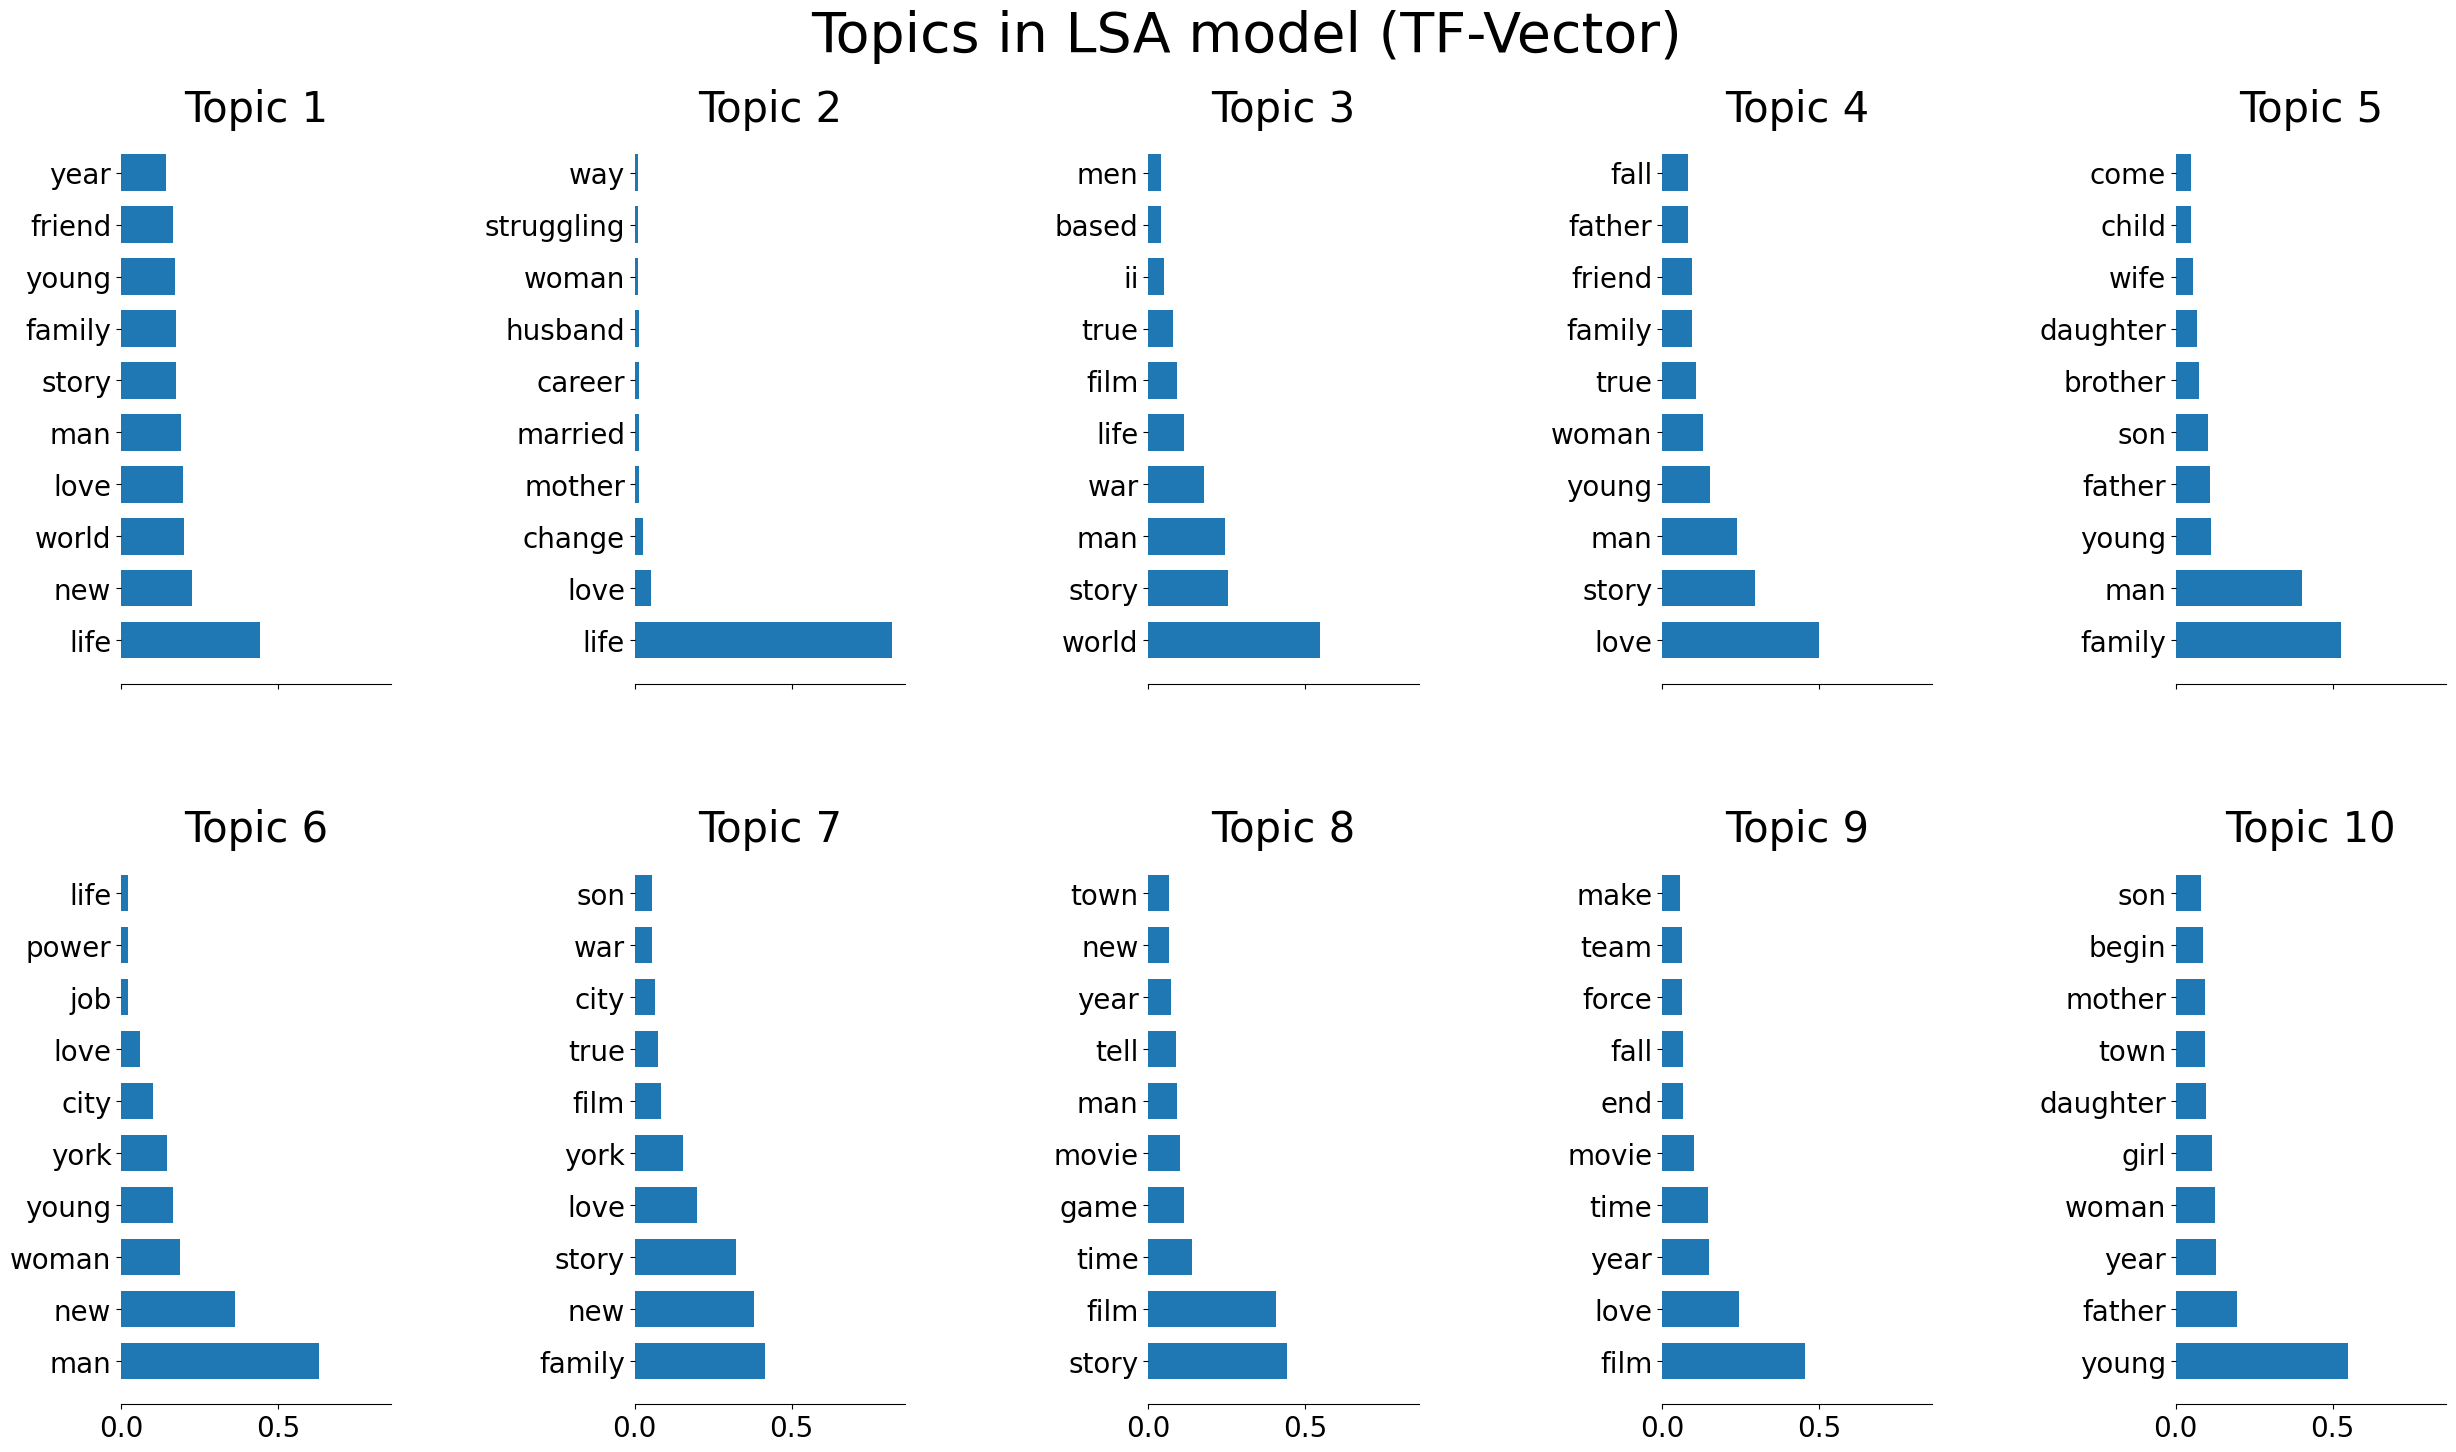

In [76]:
# Plot the most valued words
%matplotlib inline
plot_top_words(svd_model_tf, tf_vectorizer.get_feature_names_out(), 10, "Topics in LSA model (TF-Vector)")

[0.07545014 0.0788153  0.08942623 0.10662284 0.10747042 0.11474153
 0.12240906 0.14867527 0.1831408  0.32583172]


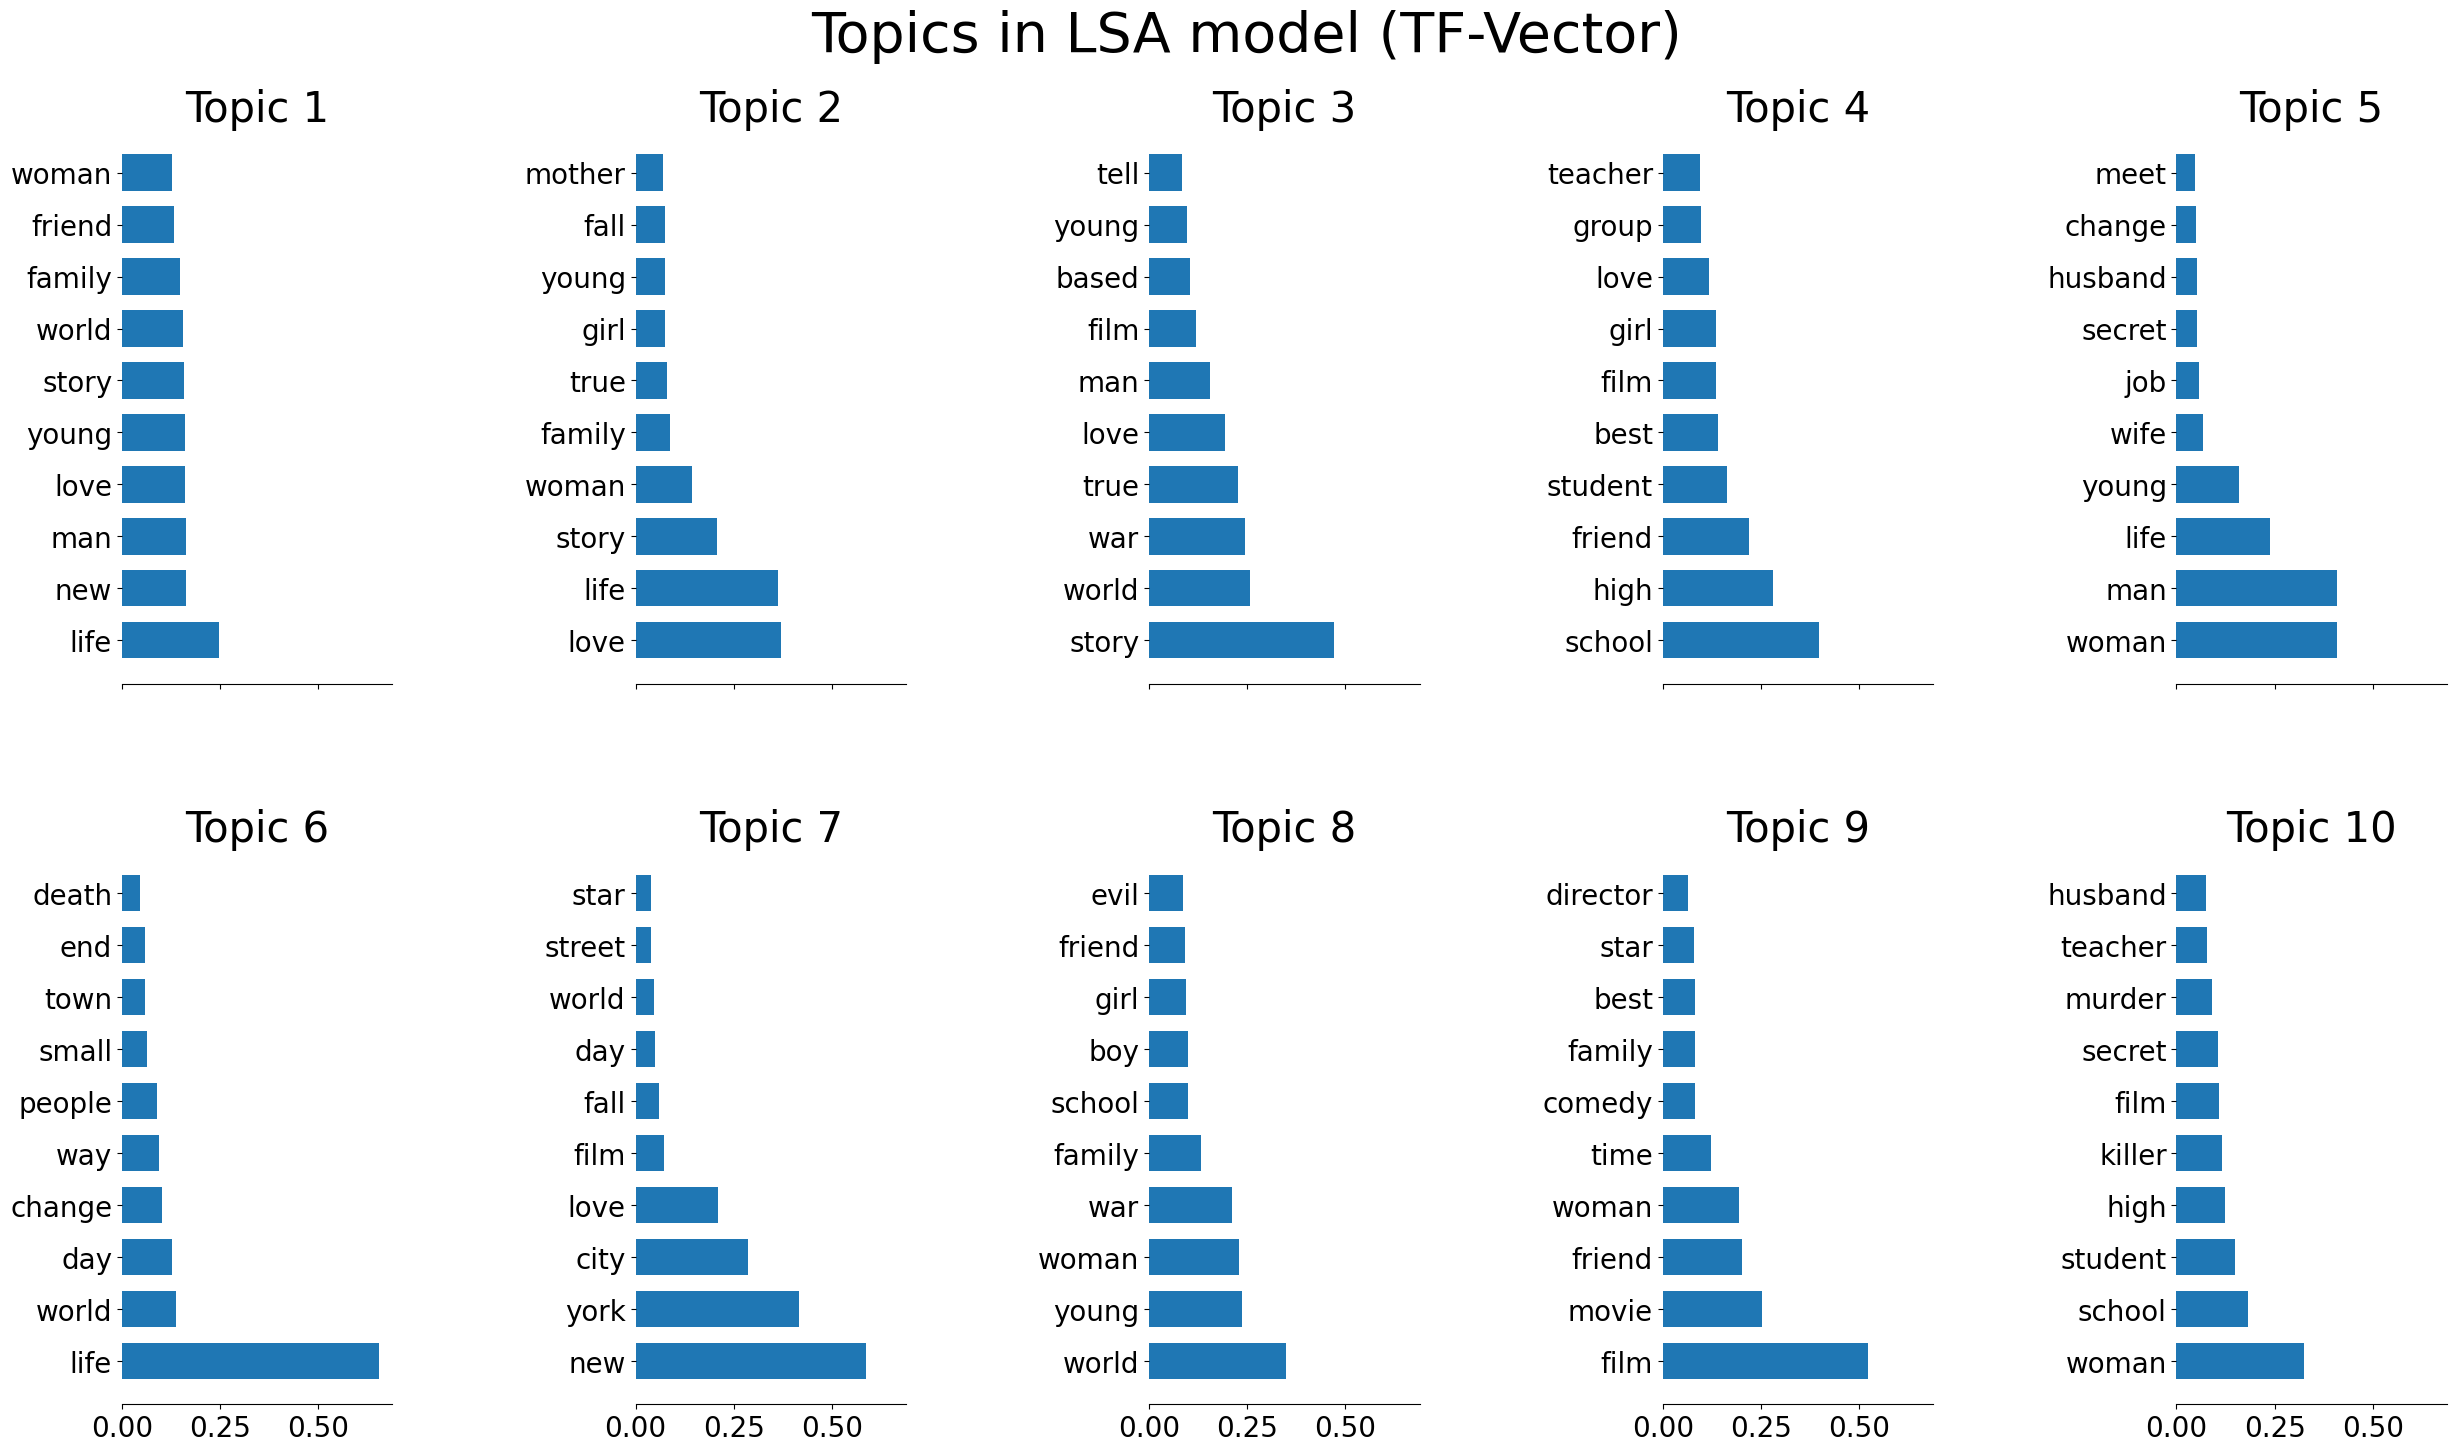

In [77]:
%matplotlib inline
plot_top_words(svd_model_tfidf, tfidf_vectorizer.get_feature_names_out(), 10, "Topics in LSA model (TF-Vector)")

#### Bert Topic Modeling ####

In [83]:
!pip install BERTopic

In [78]:
# fitting the model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(preprocessed)

In [79]:
topic_model.get_topic_info()

Topic  Count                                   Name
0      -1   2719                   -1_life_one_find_man
1       0    380           0_cop_police_detective_crime
2       1    184             1_adventure_animal_dog_cat
3       2    118              2_mother_son_father_child
4       3    103              3_earth_planet_crew_alien
5       4     92           4_school_high_college_senior
6       5     74           5_team_coach_football_player
7       6     68              6_cia_agent_spy_terrorist
8       7     68              7_dragon_king_god_warrior
9       8     68              8_war_german_nazi_germany
10      9     67             9_house_freddy_family_home
11     10     63                10_love_story_two_woman
12     11     59            11_love_tom_wedding_married
13     12     49               12_snow_queen_land_white
14     13     46       13_batman_gotham_superman_luthor
15     14     45             14_singer_rock_music_dream
16     15     41        15_vampire_werewolf_blade_bella
17     16     39               16_life_day_opera_change
18     17     35                    17_china_kung_fu_po
19     18     34        18_film_director_playwright_art
20     19     33            19_war_mission_vietnam_duty
21     20     31          20_virus_zombie_undead_deadly
22     21     27          21_boxing_boxer_fighter_fight
23     22     26         22_christmas_santa_eve_holiday
24     23     25            23_jason_lake_tommy_crystal
25     24     22              24_bond_james_007_connery
26     25     20            25_indian_gandhi_india_khan
27     26     20               26_gang_outlaw_tory_west
28     27     18          27_ship_ocean_submarine_storm
29     28     18         28_dancer_dance_ballet_dancing
30     29     16              29_family_marty_toy_woody
31     30     16          30_south_mandela_black_africa
32     31     16          31_ranger_mexican_tonto_texas
33     32     16                32_jesus_nephi_lehi_god
34     33     16          33_french_france_paris_marcel
35     34     16  34_obama_nixon_president_presidential
36     35     16            35_leon_brandi_zinos_chance
37     36     15           36_memory_wife_husband_woman
38     37     14                 37_race_racing_car_bly
39     38     13           38_alyssa_ponyo_nello_mother
40     39     13            39_surfer_bethany_wave_surf
41     40     12        40_movie_sequel_predator_sidney
42     41     12        41_faith_borgan_katherine_inger
43     42     10              42_gang_film_street_racer
44     43     10      43_immortal_musketeer_connor_kell

In [80]:
# select a specific topic and get top words
topic_model.get_topic(10)

[('love', 0.06713642242835637),
 ('story', 0.03499931119781886),
 ('two', 0.02475710942005032),
 ('woman', 0.02401657937755226),
 ('married', 0.02298656641993397),
 ('romance', 0.02025664609065608),
 ('affair', 0.0200039796542677),
 ('couple', 0.019733970596554788),
 ('different', 0.018389253135947175),
 ('writer', 0.017793438567584485)]

In [81]:
# visualizing an intertopic distance map
topic_model.visualize_topics()

In [82]:
# fitting the model for hierarchical topics
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(preprocessed, show_progress_bar=False)

topic_model = BERTopic().fit(preprocessed, embeddings)
hierarchical_topics = topic_model.hierarchical_topics(preprocessed)

100%|██████████| 52/52 [00:00<00:00, 292.00it/s]


In [83]:
# visualizing a hierarchical documents and topics
topic_model.visualize_hierarchical_documents(preprocessed, hierarchical_topics, embeddings=embeddings)

reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_hierarchical_documents(preprocessed, hierarchical_topics, reduced_embeddings=reduced_embeddings)


#### PCA (Principal Component Analysis) ####
#### Attention: To maintain the data integrity, please run PCA at the end. ####

In [85]:
# TF-IDF for PCA

tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=data.Description).toarray()
#print(len(tfidf_model.vocabulary_))

#tfidf_docs = pd.DataFrame(tfidf_docs)
#tfidf_docs = tfidf_docs - tfidf_docs.mean()
print(tfidf_docs.shape)

(4803, 18865)


In [86]:
# TF-IDF for PCA
print(tfidf_docs[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [87]:
# Use LDA model in sklearn.discriminant_analysis.LinearDiscriminant- Analysis.
# Before applying, need to compute the centroids of binary class (Liked movie with over vote_average mean point or dislike movie with under vote_average point)
mask = data.Liked.astype(bool).values
Liked_centroid = tfidf_docs[mask].mean(axis=0)
dislike_centroid = tfidf_docs[~mask].mean(axis=0)
favourte_score = tfidf_docs.dot(Liked_centroid - dislike_centroid)

In [88]:
# Transform features by scaling each feature to a given range.
data_pca = data
data_pca['lda_score'] = MinMaxScaler().fit_transform(favourte_score.reshape(-1,1))
data_pca['lda_predict'] = (data.lda_score > .5).astype(int)

In [89]:
# output the results
data_pca['Liked lda_predict lda_score'.split()].round(2)

Liked  lda_predict  lda_score
0         1            0       0.42
1         1            1       0.56
2         1            0       0.44
3         1            0       0.44
4         1            1       0.52
...     ...          ...        ...
4798      1            0       0.44
4799      0            0       0.32
4800      1            1       0.54
4801      0            0       0.29
4802      1            0       0.42

[4803 rows x 3 columns]

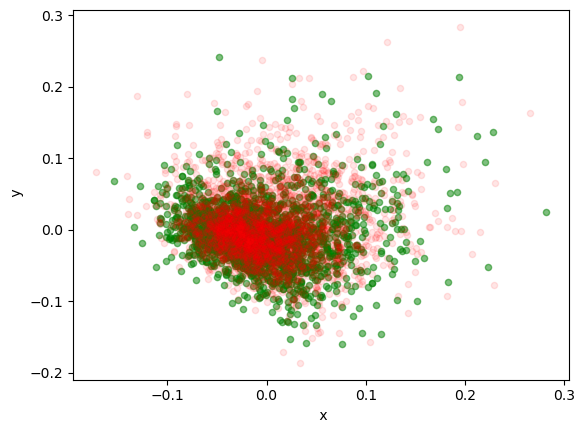

<Figure size 2000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [90]:
# PCA visualization by using TF-IDF for PCA

mask = data_pca.Liked.astype(bool).values
pca_model = PCA(n_components=3)
tfidf_docs_3d = pca_model.fit_transform(tfidf_docs)
data_pca = pd.DataFrame(tfidf_docs_3d)
ax = data_pca[~mask].plot(x=0, y=1, kind='scatter', alpha=.5, c='green')
data_pca[mask].plot(x=0,y=1, ax=ax, alpha=.1, kind='scatter', c='red')
plt.xlabel(' x')
plt.ylabel(' y')
plt.figure(figsize=(20,20))
plt.show()
plt.savefig('Description_lda_2d_scatter.png')

#### 2.3. Analysis Task: Searching for similar movies ####

#### Solution1: Consine Similarity ####

In [91]:
# create variables for the recommendation functions
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

cosine_sim = linear_kernel(tfidf_vector, tfidf_vector)
cosine_sim1 = linear_kernel(tf_vector, tf_vector)
data = data.reset_index()
titles = data['title']
indices = pd.Series(data.index, index=data['title'])

In [92]:
### Enter the Title here to find similar Movies:
movie_title = "Spider-Man"

# function to get the most similar movies based on the similarity score of the descriptions
def compute_cosine_similarity(doc_features, corpus_features, top_n = 10):
    top_n = top_n+1
    # get document vectors
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    # compute similarities
    similarity = np.dot(doc_features,corpus_features.T)
    # get docs with highest similarity scores
    top_docs = similarity.argsort()[::-1][1:top_n]
    top_docs_with_score = [(index, round(similarity[index], 3)) for index in top_docs]
    return top_docs_with_score

#print results
query_docs_tfidf = tfidf_vector[data.title.to_list().index(movie_title)]
tfidf_vectorizer.transform(data.Description[data['title']==movie_title])
top_similar_docs = compute_cosine_similarity(query_docs_tfidf, tfidf_vector)
print( 'Document Similarity Analysis using Cosine Similarity')
print( '='*60)
print('Movie:',movie_title,':')
print('Top', len(top_similar_docs), 'similar docs:')
print('-'*60)
for doc_index, sim_score in top_similar_docs:
    print('Similar Title index: {} Similarity Score: {}\nDoc: {}'.format(doc_index,sim_score, data.original_title[doc_index]))
    print('-'*60)
print()

Document Similarity Analysis using Cosine Similarity
Movie: Spider-Man :
Top 10 similar docs:
------------------------------------------------------------
Similar Title index: 38 Similarity Score: 0.206
Doc: The Amazing Spider-Man 2
------------------------------------------------------------
Similar Title index: 3124 Similarity Score: 0.199
Doc: The Reef
------------------------------------------------------------
Similar Title index: 5 Similarity Score: 0.192
Doc: Spider-Man 3
------------------------------------------------------------
Similar Title index: 20 Similarity Score: 0.176
Doc: The Amazing Spider-Man
------------------------------------------------------------
Similar Title index: 1534 Similarity Score: 0.172
Doc: Arachnophobia
------------------------------------------------------------
Similar Title index: 1119 Similarity Score: 0.165
Doc: 21 Jump Street
------------------------------------------------------------
Similar Title index: 3216 Similarity Score: 0.161
Doc: El

In [93]:
# function to get a recommandation based on the similarity of the description only
def get_recommendations(title):
    index = data.title.to_list().index(title)
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores_df = pd.DataFrame(sim_scores, columns=['Index', 'sim_score'])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10]
    movie_indices = [i[0] for i in sim_scores]
    sim_scores_df = sim_scores_df.round(3)
    result = pd.merge(titles.iloc[movie_indices],sim_scores_df, left_index=True, right_index=True)
    result = result.drop('Index', axis=1)
    return result
get_recommendations("Spider-Man")

title  sim_score
38    The Amazing Spider-Man 2      0.206
3124                  The Reef      0.199
5                 Spider-Man 3      0.192
20      The Amazing Spider-Man      0.176
1534             Arachnophobia      0.172
1119            21 Jump Street      0.165
3216                  Election      0.161
1637       Eight Legged Freaks      0.158
30                Spider-Man 2      0.154

In [94]:
# improving the recommondation function by considering features like genres, vote_count & vote_average
def improved_recommendations(title):
    index = data.title.to_list().index(title)
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores_df = pd.DataFrame(sim_scores, columns=['Index', 'sim_score'])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:30]
    movie_indices = [i[0] for i in sim_scores]
    movies = data.iloc[movie_indices][['title', 'vote_count', 'vote_average','genres']]
    genres_ = data.genres[index]
    movie_list = movies.values.tolist()
    new = []
    counter_row = 0
    counter = 1
    for movie in movie_list:
        for row in movie:
            if counter % 4 == 0:
                for genres in row:
                    if genres in genres_:
                        if movie[3] == row:
                            new.append(counter_row)
                            break
            counter +=1
        counter_row +=1

    indices =[]
    for i in range(len(movie_indices)):
        if i in new:
            indices.append(movie_indices[i])
    movies = data.iloc[indices][['title', 'vote_count', 'vote_average','genres']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull()) & (movies['vote_average']>=C)]

    sim_scores_df = sim_scores_df.round(3)
    qualified = pd.merge(qualified,sim_scores_df, left_index=True, right_index=True)
    qualified = qualified.drop('Index', axis=1)
    print("Finding similar movies:")
    print(title)
    print("Should include one genres of:", genres_)
    print("Vote-average >=", round(C,2))
    print("Vote-count >=", round(m,2))
    return qualified
improved_recommendations('Spider-Man')

Finding similar movies:
Spider-Man
Should include one genres of: ['Fantasy', 'Action']
Vote-average >= 5.75
Vote-count >= 3874.8


title  vote_count  vote_average  \
38    The Amazing Spider-Man 2        4179           6.5   
20      The Amazing Spider-Man        6586           6.5   
1119            21 Jump Street        4074           6.7   
30                Spider-Man 2        4321           6.7   
1720                  Kick-Ass        4645           7.1   

                            genres  sim_score  
38    [Action, Adventure, Fantasy]      0.206  
20    [Action, Adventure, Fantasy]      0.176  
1119       [Action, Comedy, Crime]      0.165  
30    [Action, Adventure, Fantasy]      0.154  
1720               [Action, Crime]      0.127

In [95]:
# This function edits the improved recommendations function to additionally consider the assigned topics to the dataset for each movie.
# the considered topics can be changed since there are 4 different topic columns with different solutions
def improved_recommendations_topics(title):
    index = data.title.to_list().index(title)
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores_df = pd.DataFrame(sim_scores, columns=['Index', 'sim_score'])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:30]
    movie_indices = [i[0] for i in sim_scores]
    movies = data.iloc[movie_indices][['title', 'vote_count', 'vote_average','genres']]
    genres_ = data.genres[index]
    #topic column need to be the same as in line 39
    topic = data.topicTFIDF_Limited[index]
    movie_list = movies.values.tolist()
    new = []
    counter_row = 0
    counter = 1
    for movie in movie_list:
        for row in movie:
            if counter % 4 == 0:
                for genres in row:
                    if genres in genres_:
                        if movie[3] == row:
                            new.append(counter_row)
                            break
            counter +=1
        counter_row +=1

    indices =[]
    for i in range(len(movie_indices)):
        if i in new:
            indices.append(movie_indices[i])
    movies = data.iloc[indices][['title', 'vote_count', 'vote_average','genres','topicTF','topicTF_Limited','topicTFIDF','topicTFIDF_Limited']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    #topic column need to be the same (at the end)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull()) & (movies['vote_average']>=C) & (movies['topicTFIDF_Limited'] == topic)]

    sim_scores_df = sim_scores_df.round(3)
    qualified = pd.merge(qualified,sim_scores_df, left_index=True, right_index=True)
    qualified = qualified.drop('Index', axis=1)
    print("Finding similar movies:")
    print(title)
    print("Topic:",topic)
    print("Should include one genres of:", genres_)
    print("Vote-average >=", round(C,2))
    print("Vote-count >=", round(m,2))
    return qualified
improved_recommendations_topics('Spider-Man')


Finding similar movies:
Spider-Man
Topic: 8
Should include one genres of: ['Fantasy', 'Action']
Vote-average >= 5.75
Vote-count >= 3874.8


title  vote_count  vote_average  \
38    The Amazing Spider-Man 2        4179           6.5   
20      The Amazing Spider-Man        6586           6.5   
1720                  Kick-Ass        4645           7.1   

                            genres  topicTF  topicTF_Limited  topicTFIDF  \
38    [Action, Adventure, Fantasy]        4                3           4   
20    [Action, Adventure, Fantasy]        5                3           4   
1720               [Action, Crime]        8                4           1   

      topicTFIDF_Limited  sim_score  
38                     8      0.206  
20                     8      0.176  
1720                   8      0.127

#### Solution 2: Latent Semantic Indexing(LSI) ####

In [55]:
# create a train function and add an SVD model to decompose the tf-idf matrix
def train(documents):
    vectorizer = TfidfVectorizer()
    svd = TruncatedSVD(n_components=1500,
                     algorithm='randomized',
                     n_iter=10, random_state=42)
    lsi = Pipeline([('tfidf', vectorizer),
                  ('svd', svd)])
    matrix = lsi.fit_transform(documents)
    return lsi, matrix

In [57]:
documents = data.title
vectorizer, tfidf = train(documents)

# Distance comparison and search
def search(query, N):
    # Input: retrieve the text string query, return the number of results
    # Output: index of the most relevant N results across all documents
    transformed_query = vectorizer.transform([query])
    cosine_similarities = linear_kernel(transformed_query, tfidf).flatten()
    idx = np.argpartition(cosine_similarities, -N)[-N:]
    related_docs_indices = idx[np.argsort((-cosine_similarities)[idx])]
    return related_docs_indices, cosine_similarities[related_docs_indices]

# Retrieve the initial movie title from the index mapping
movie_title=pd.DataFrame([documents[idx] for idx in search('Spider-Man', 10)[0]],
                         columns=['title'])
movie_title

title
0              Spider-Man 2
1              Spider-Man 3
2                Spider-Man
3                    Spider
4    The Amazing Spider-Man
5  The Amazing Spider-Man 2
6                   The Man
7       Along Came a Spider
8                Little Man
9   The Man from U.N.C.L.E.